C:\Users\aguit\AppData\Local\Temp\ipykernel_166456\563832954.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_loc['AP_DAT_DEB'] = pd.to_datetime(data_loc['AP_DAT_DEB'], errors='coerce')



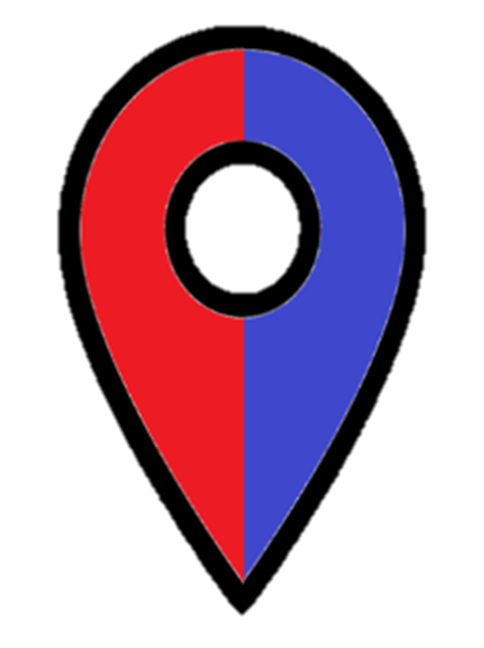
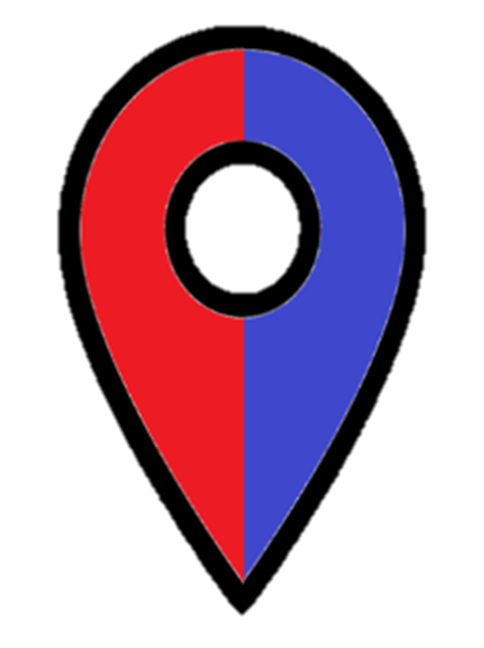
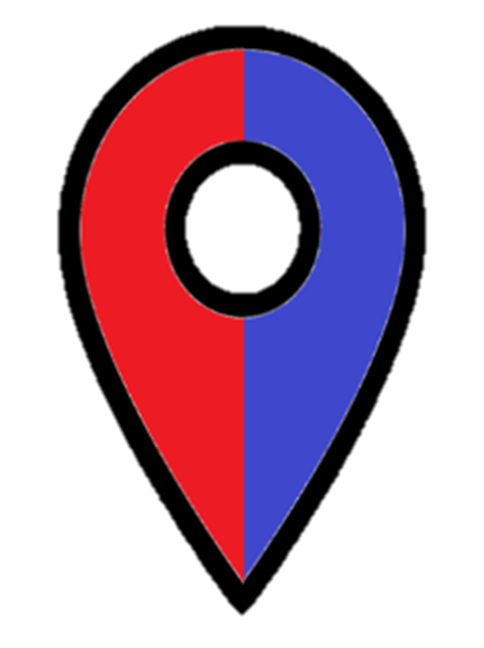
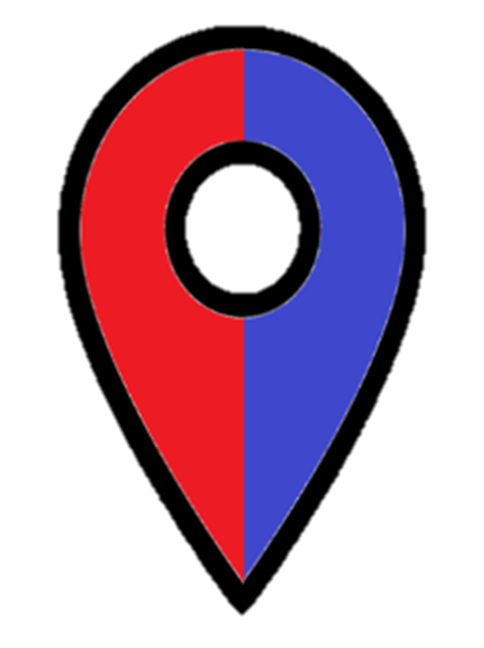
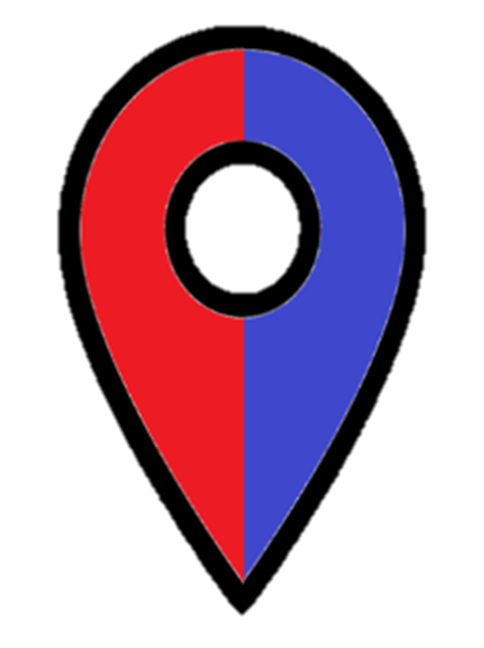
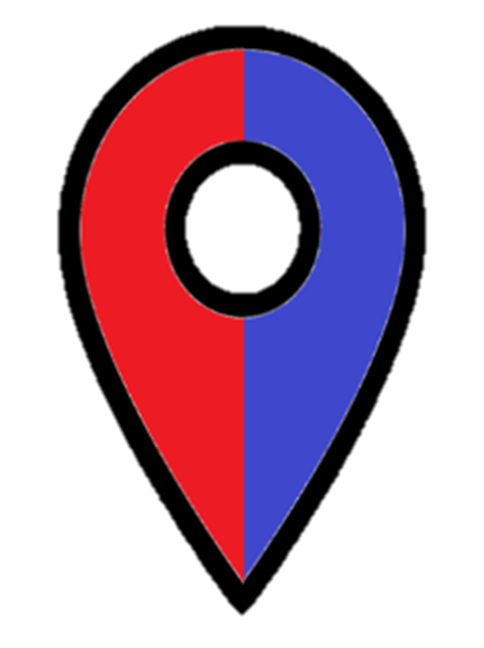
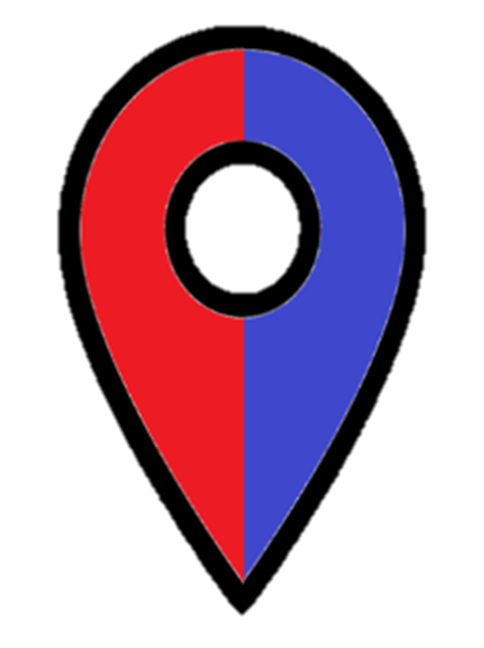
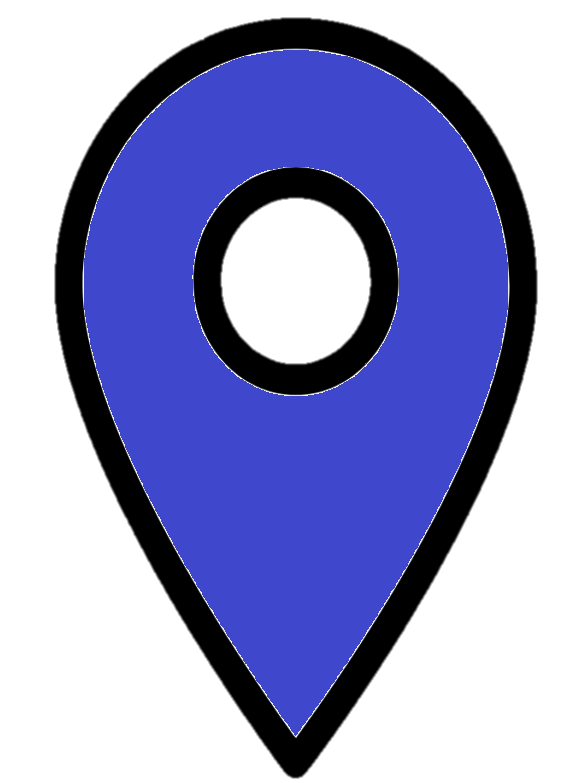
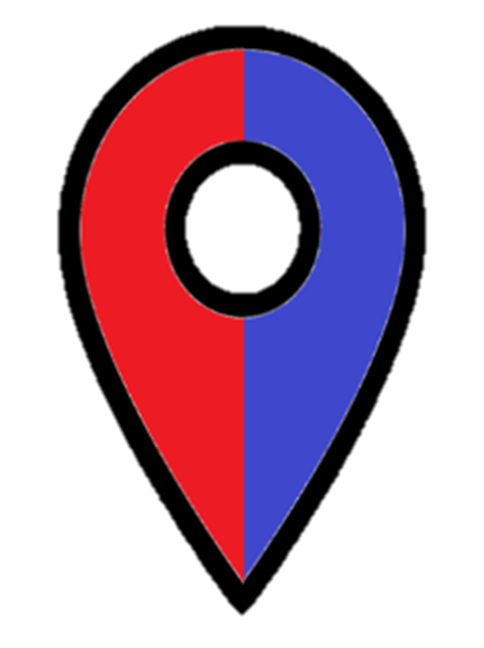
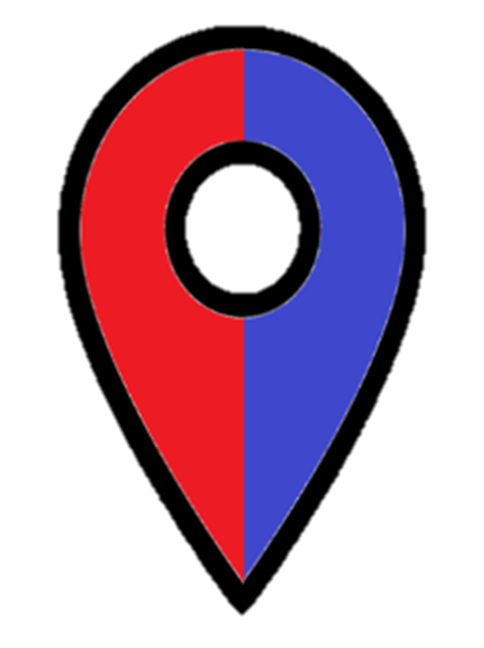
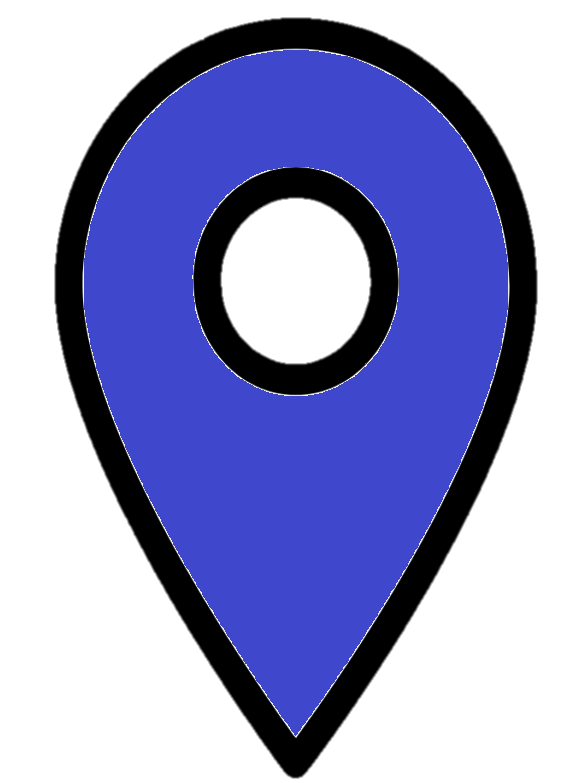
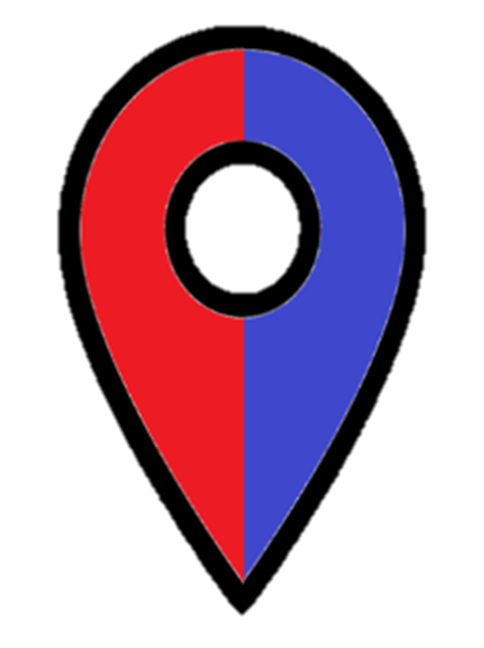
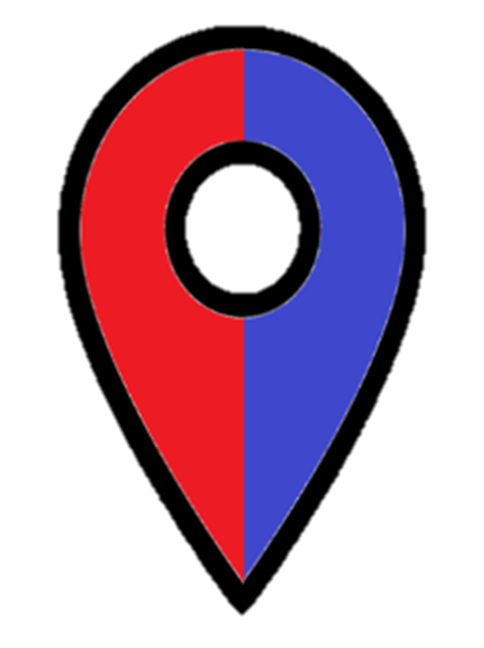
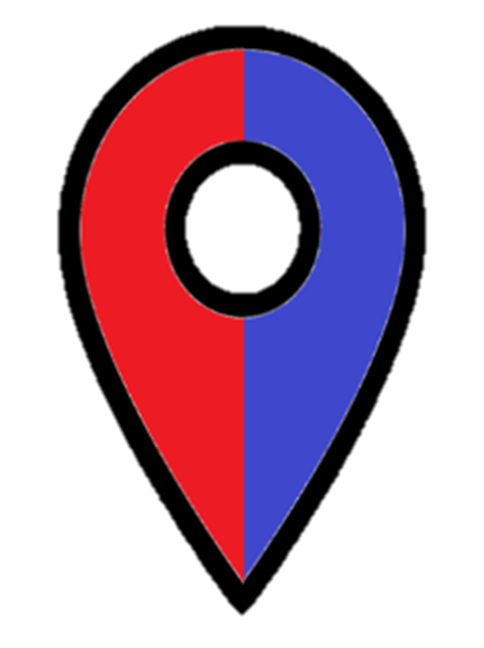
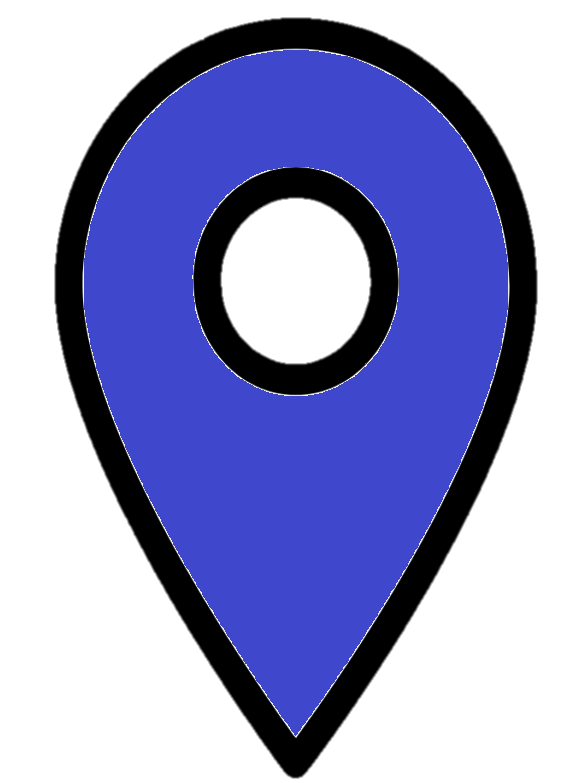
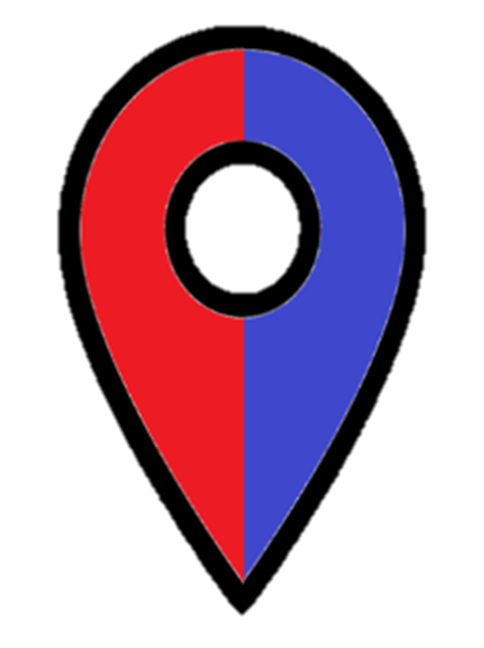
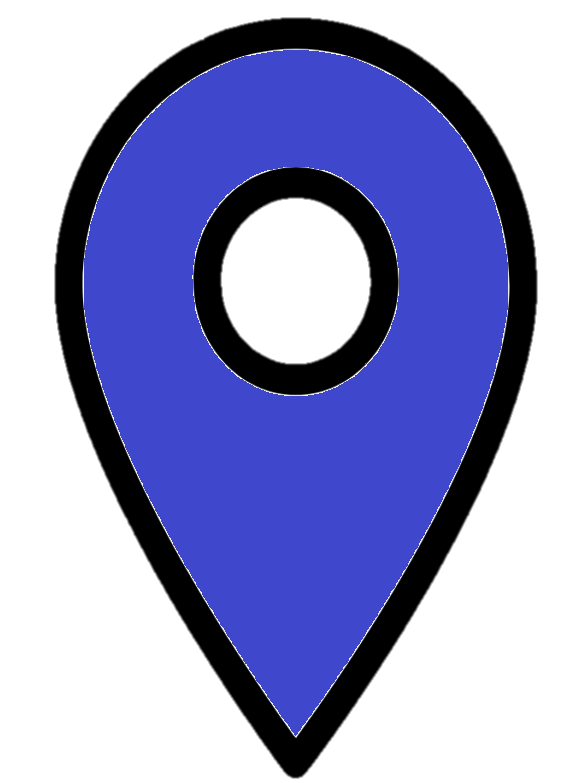
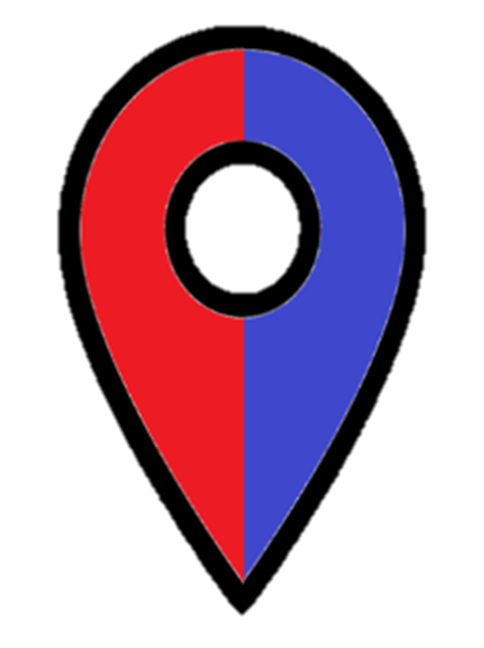
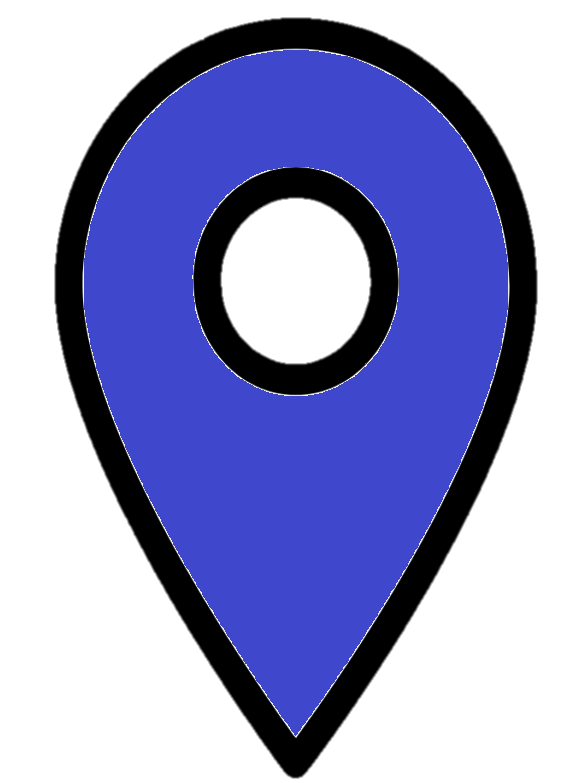
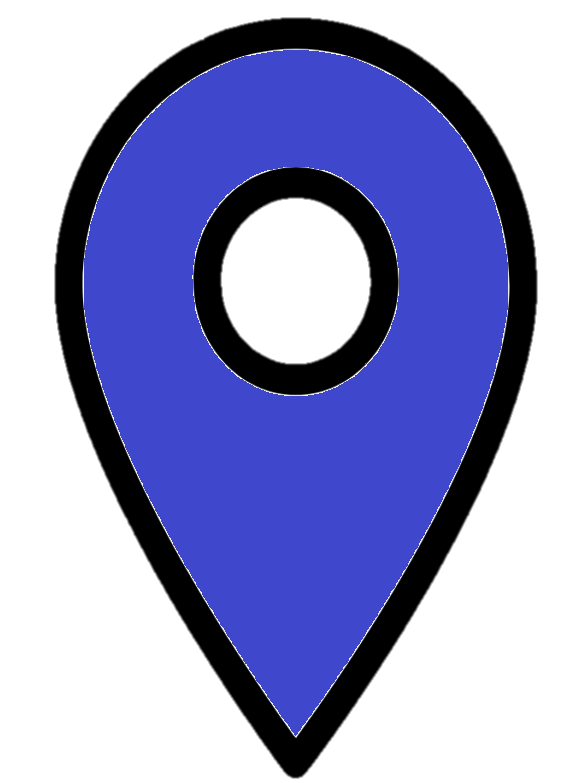
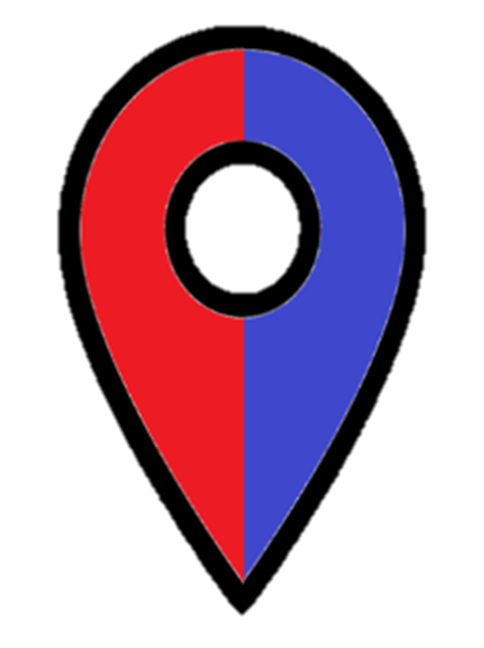
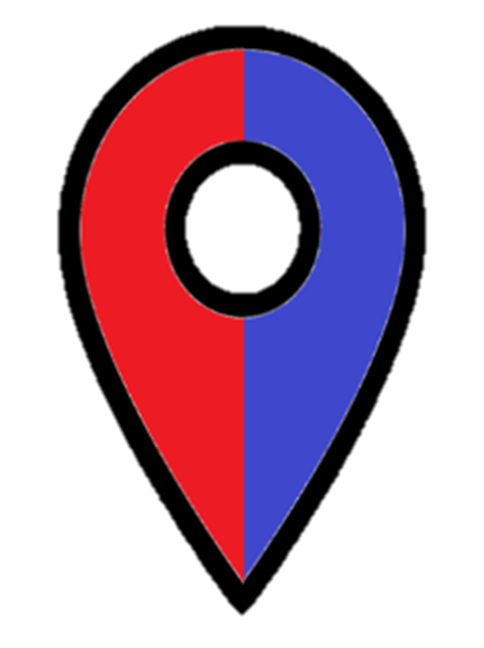
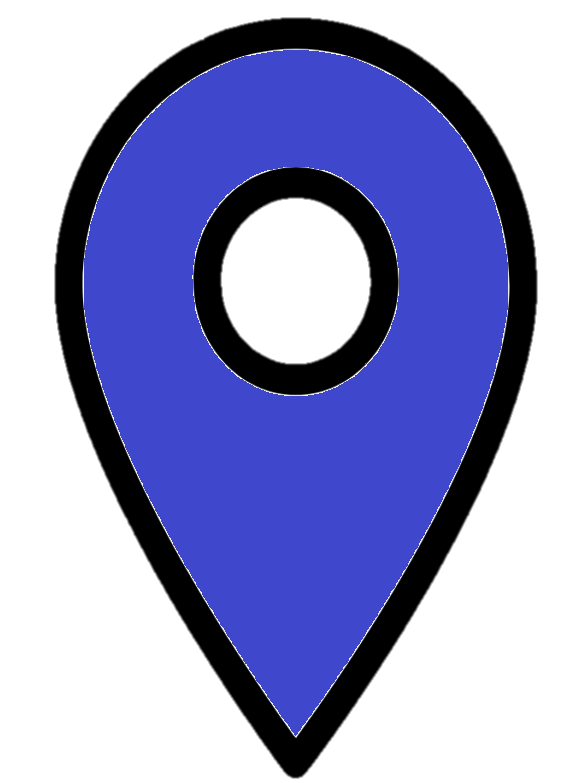
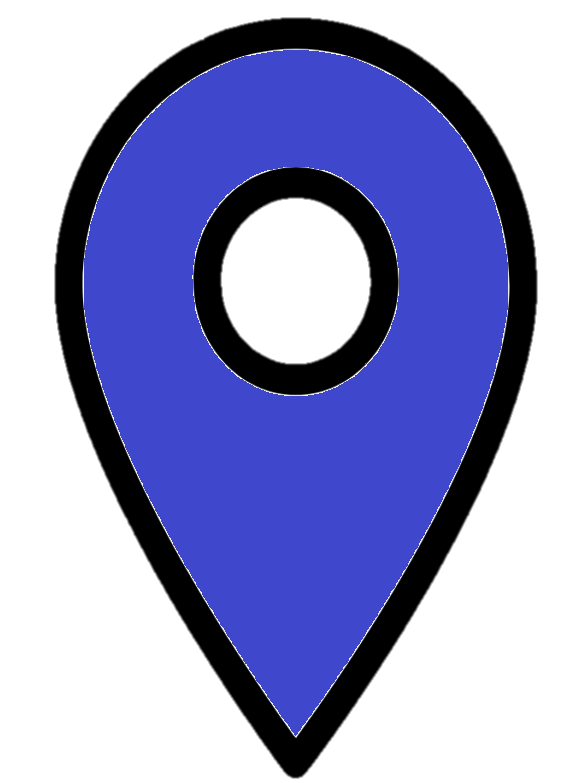
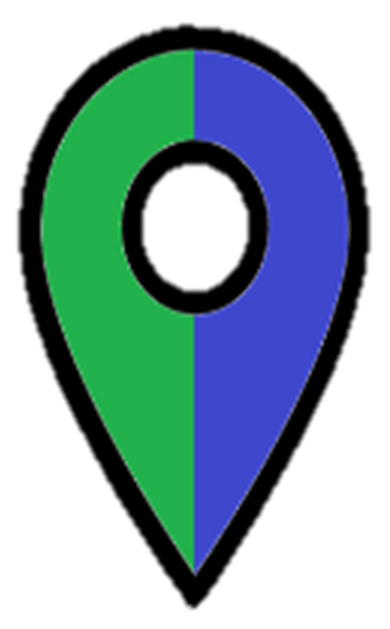
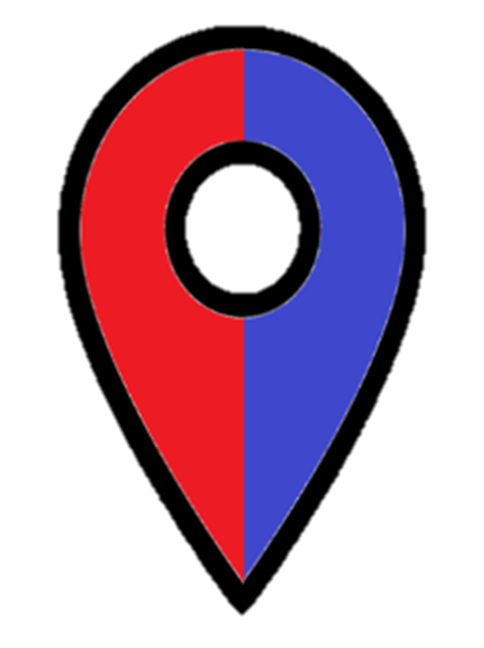
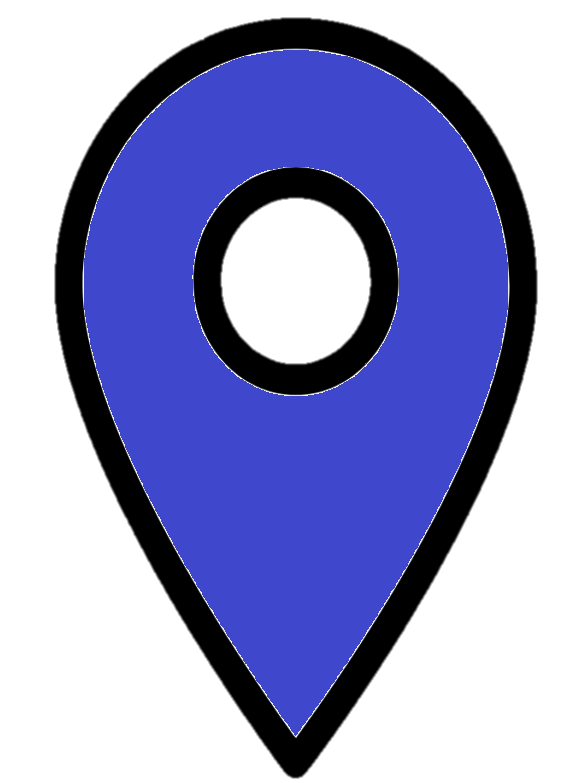
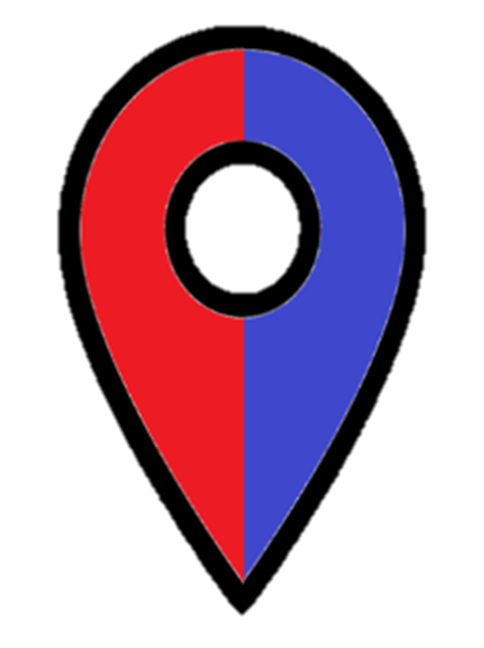
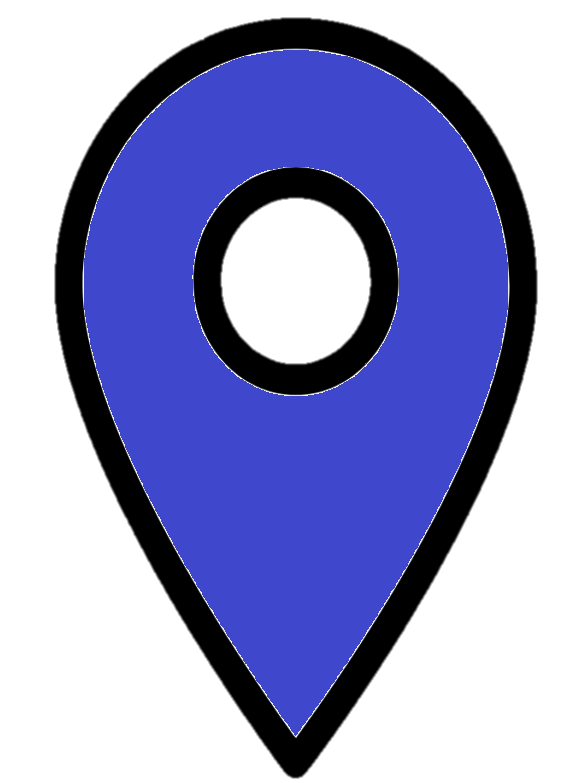
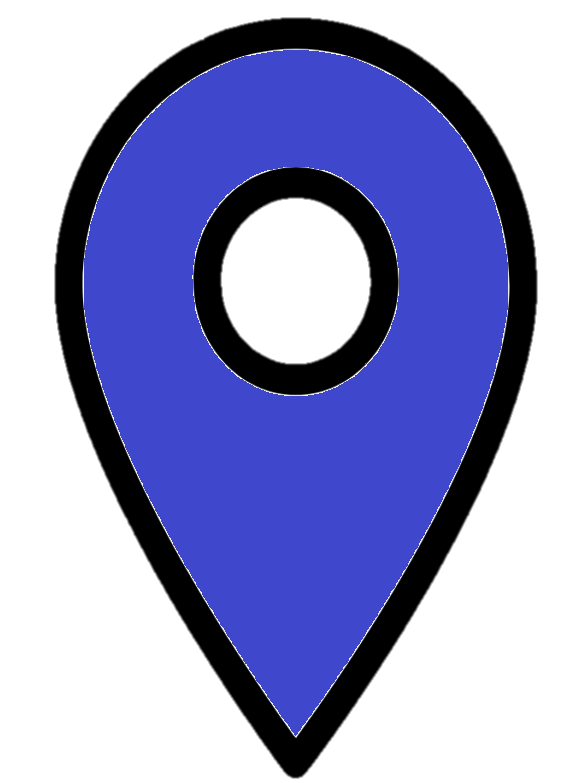
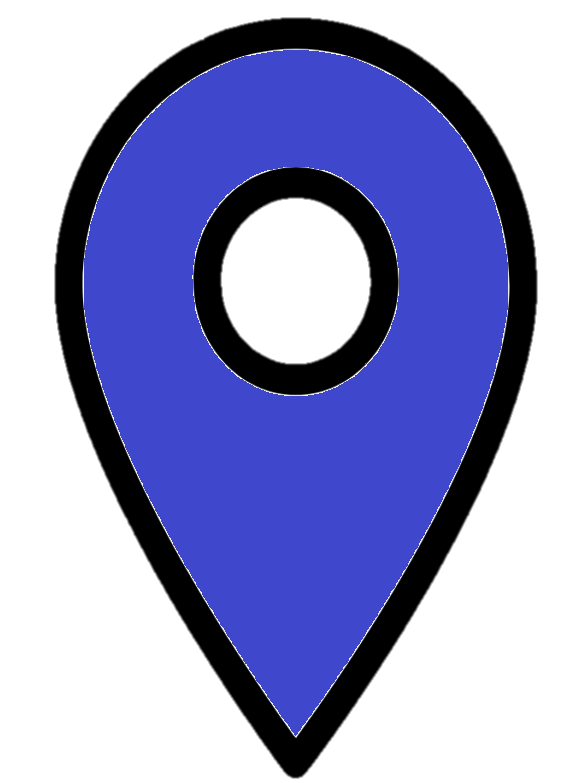
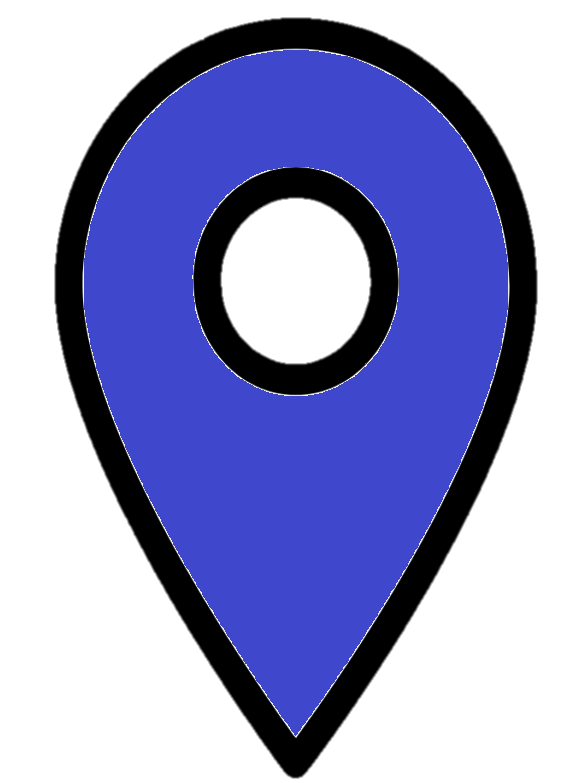
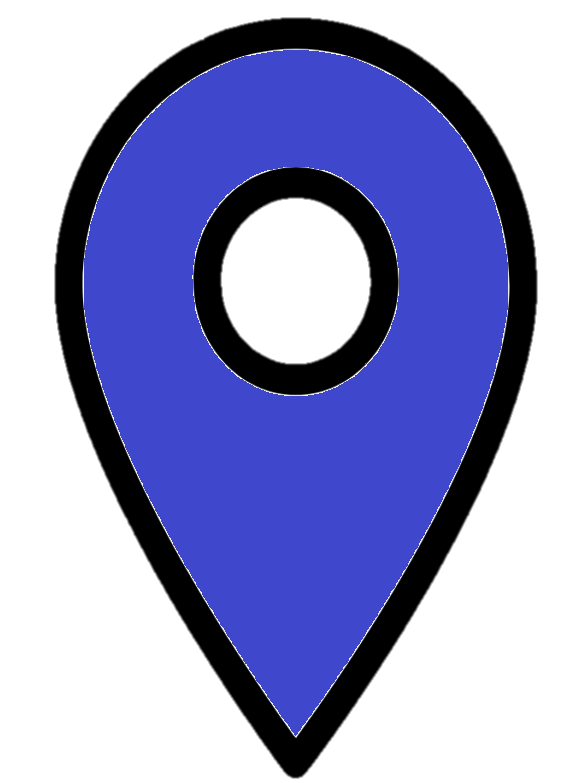
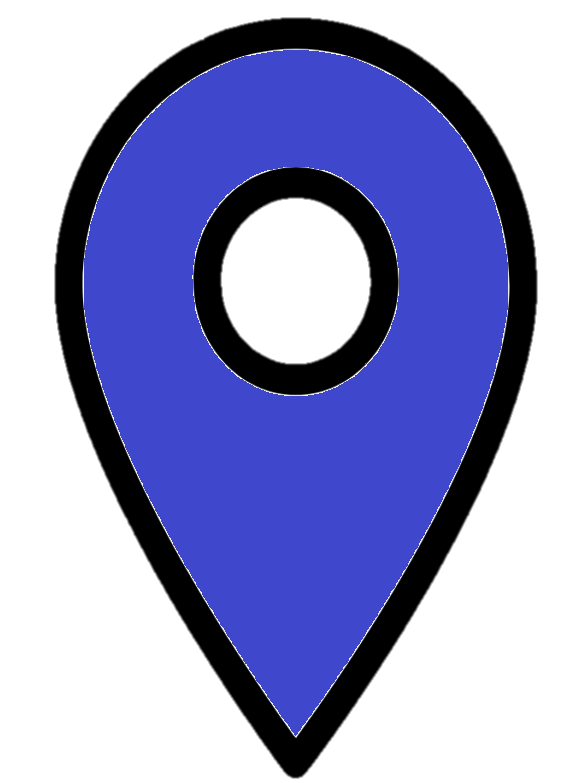
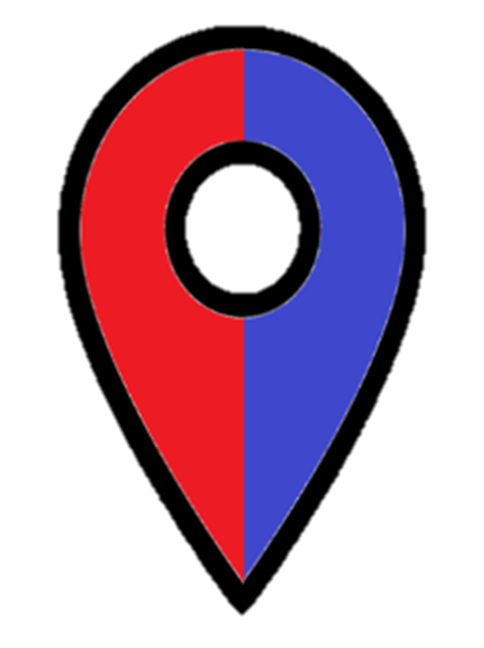
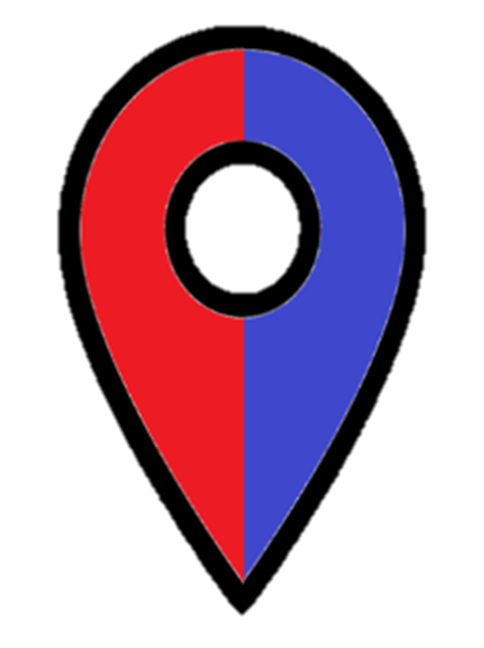
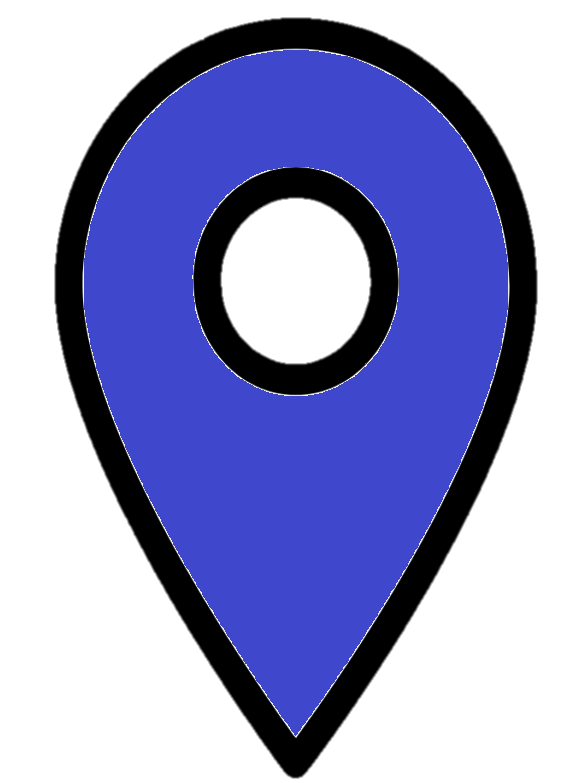
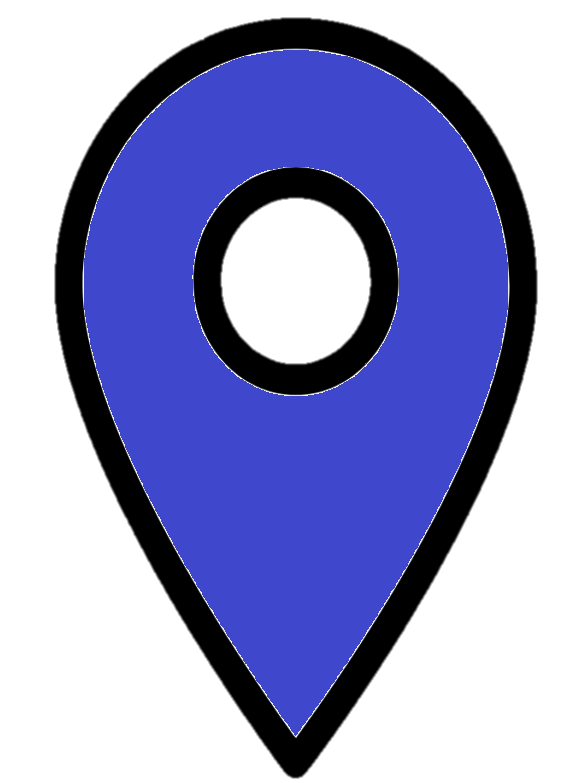
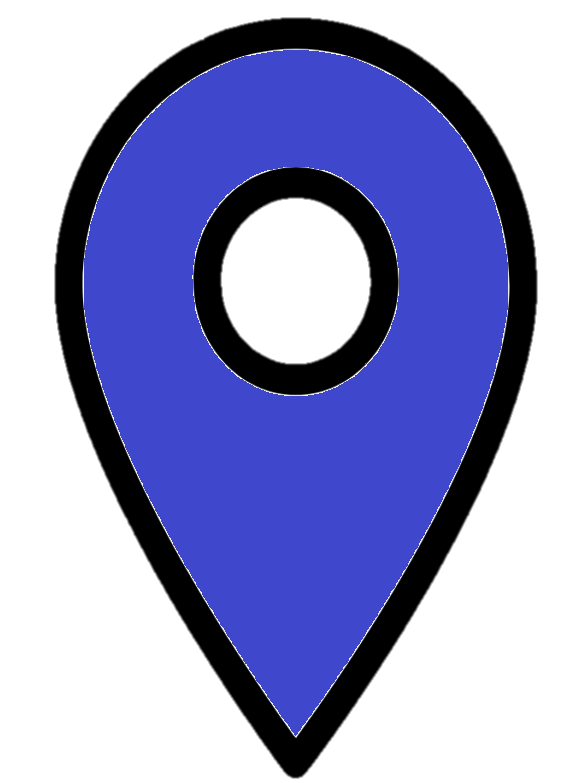
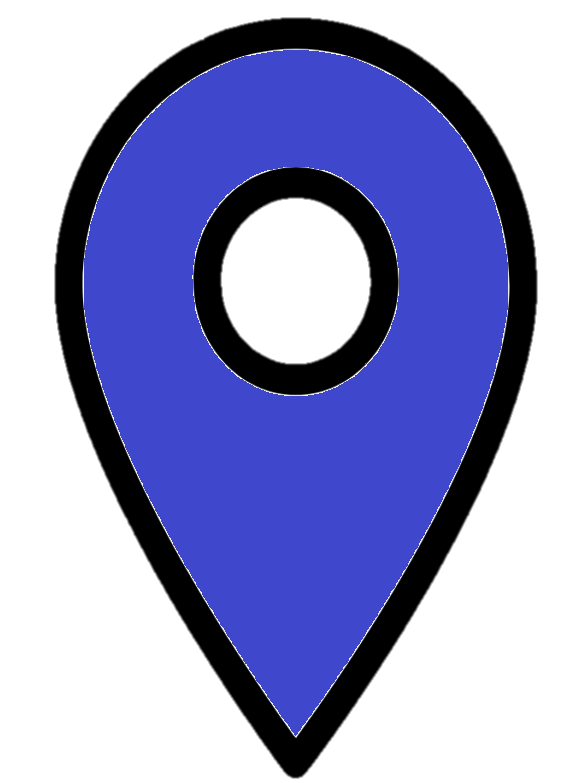
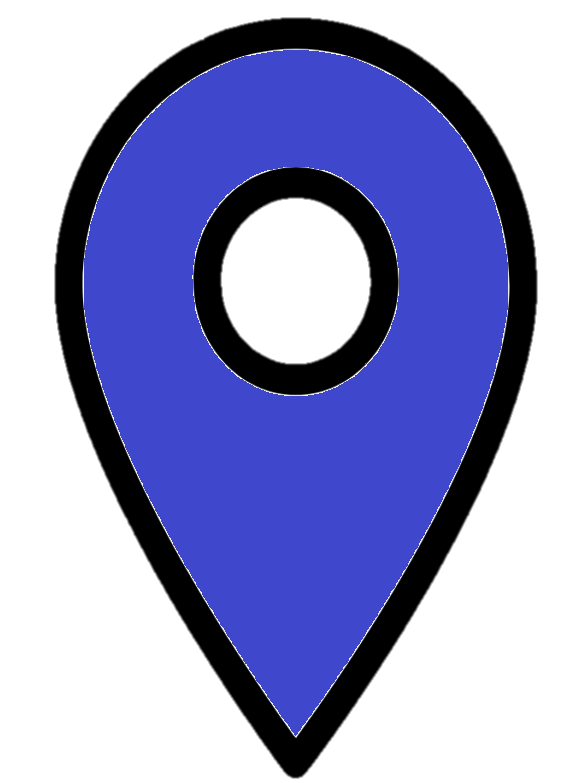
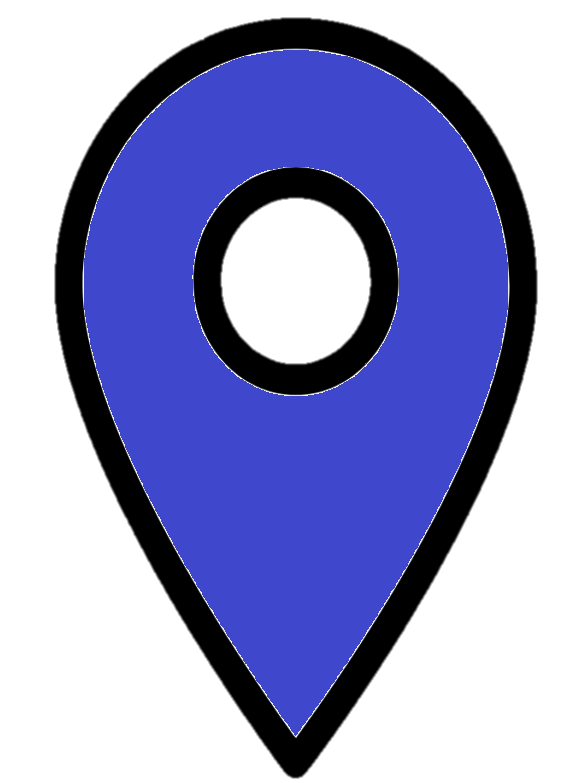
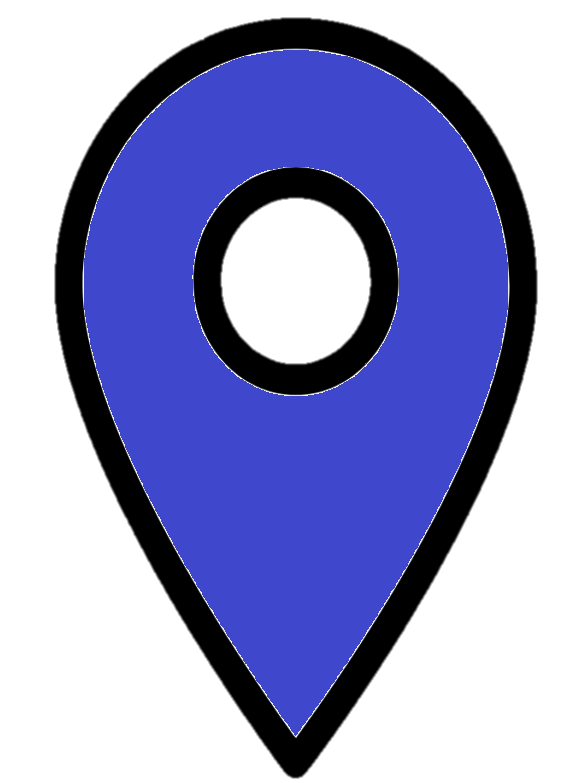
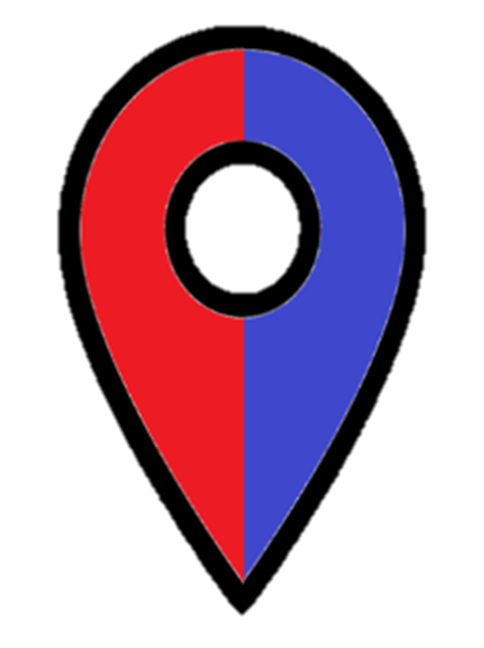
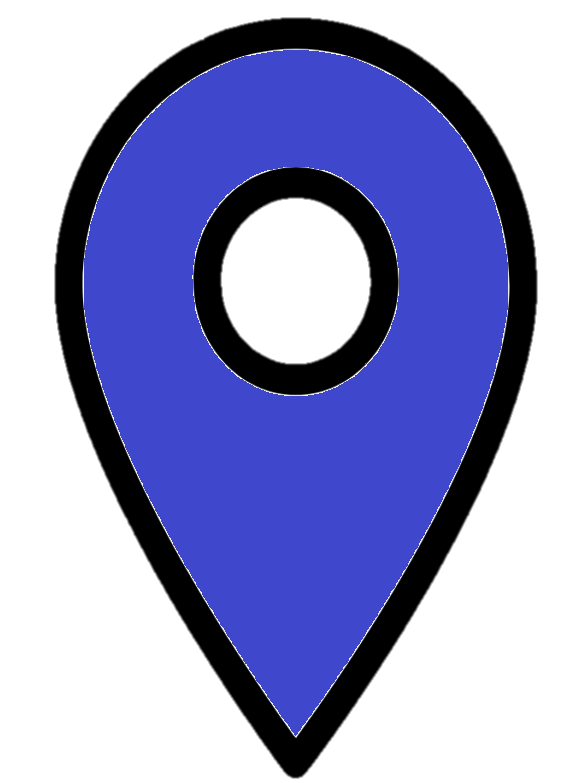
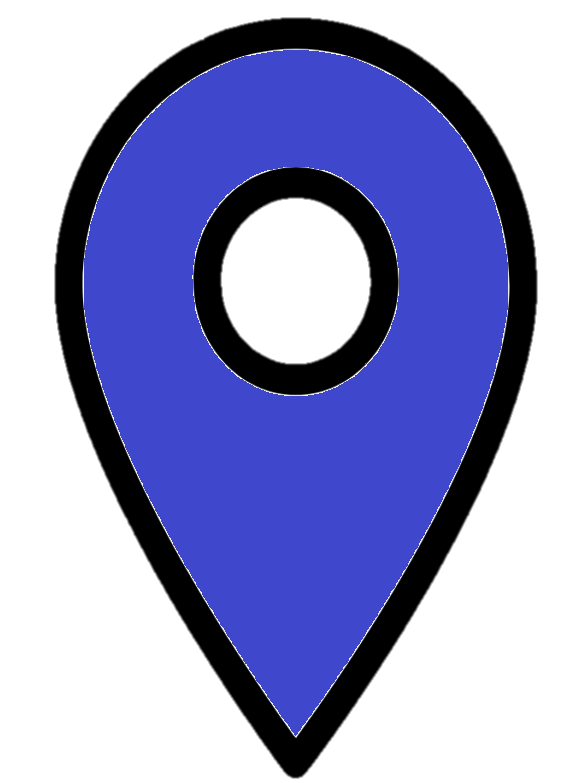
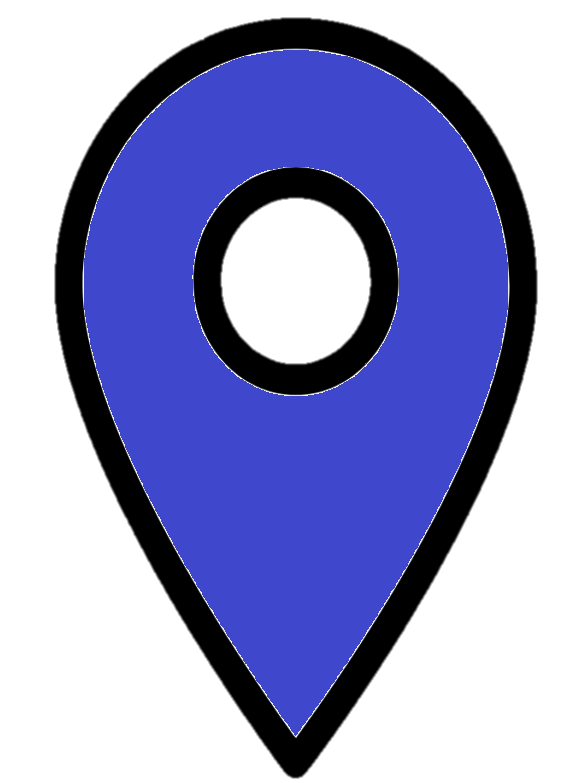
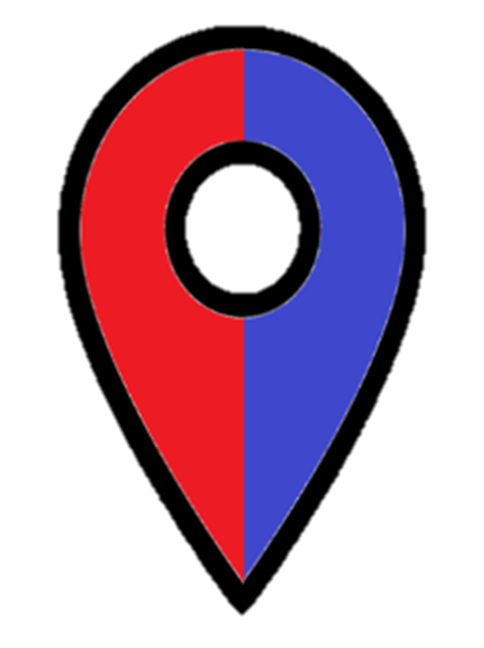
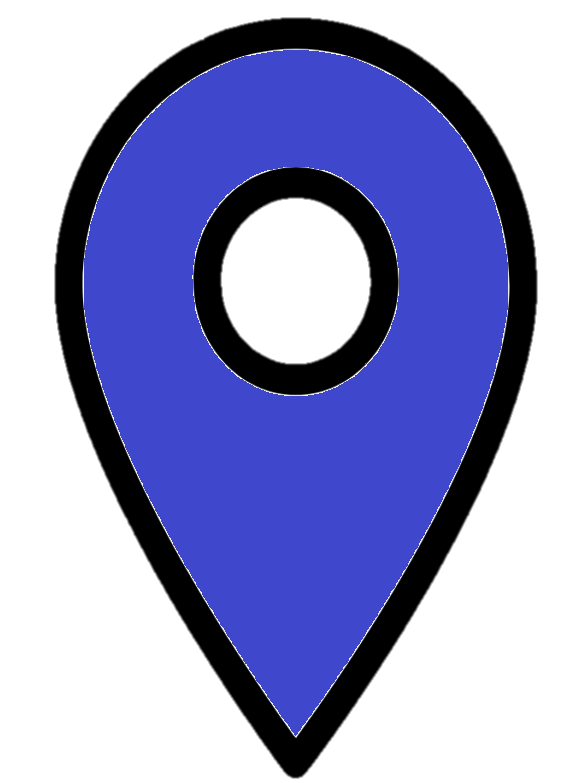
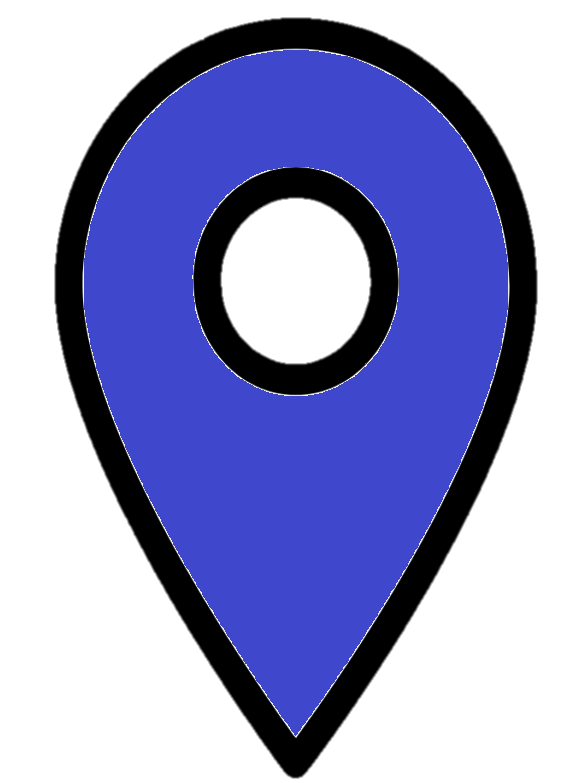
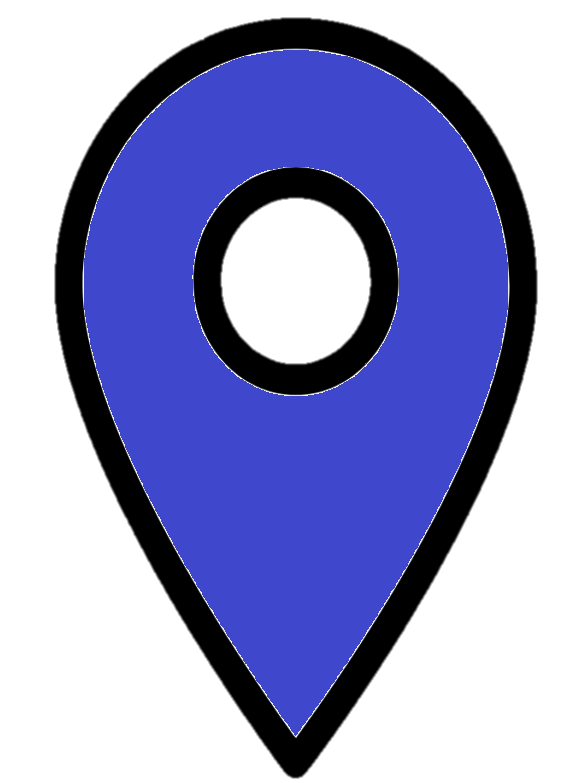
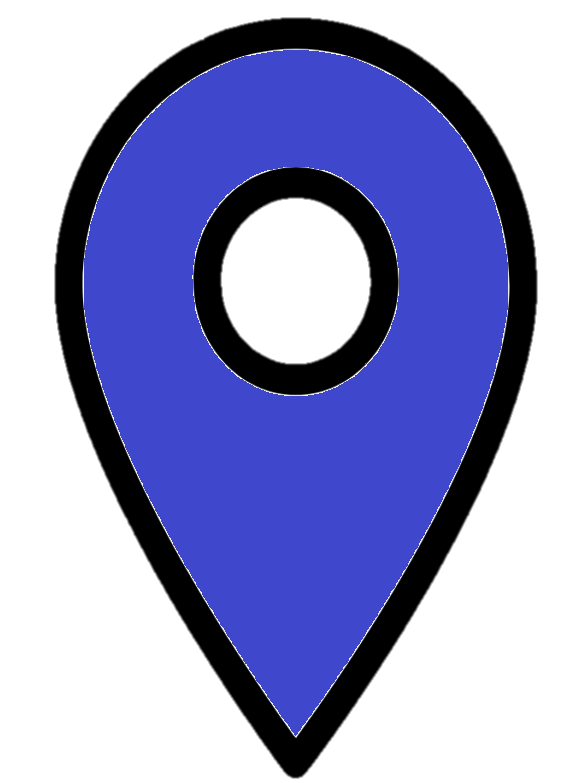
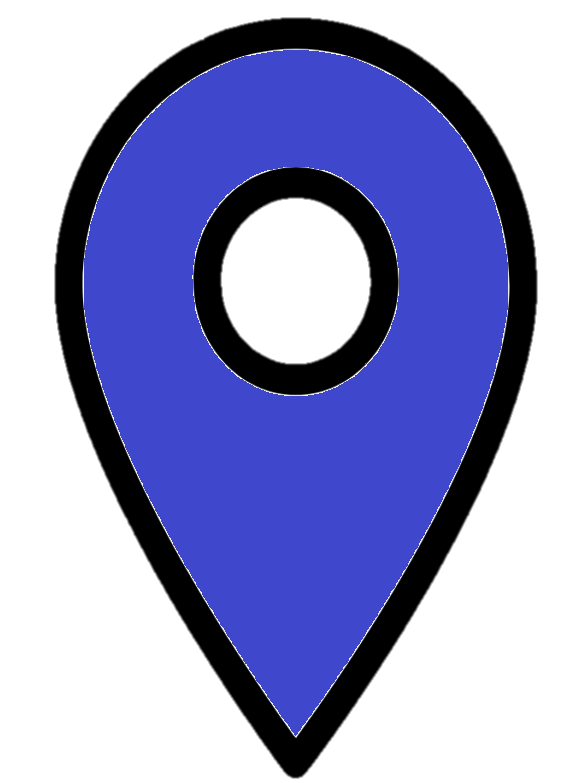
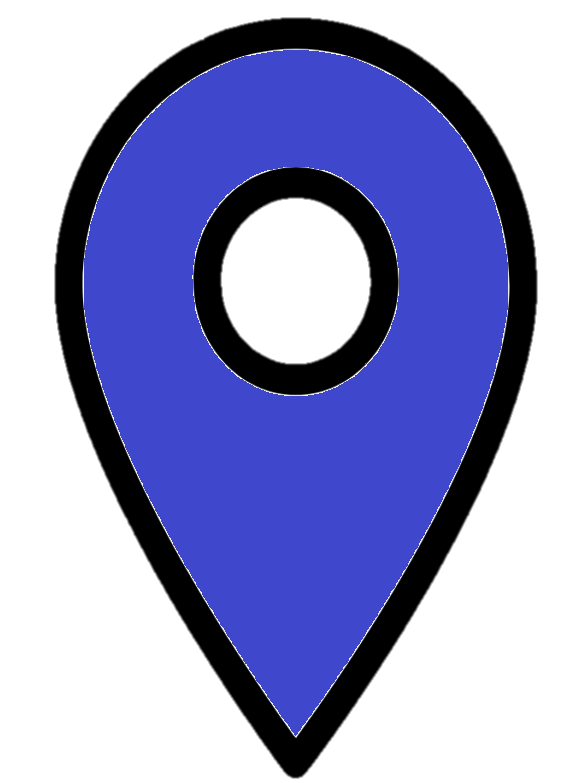
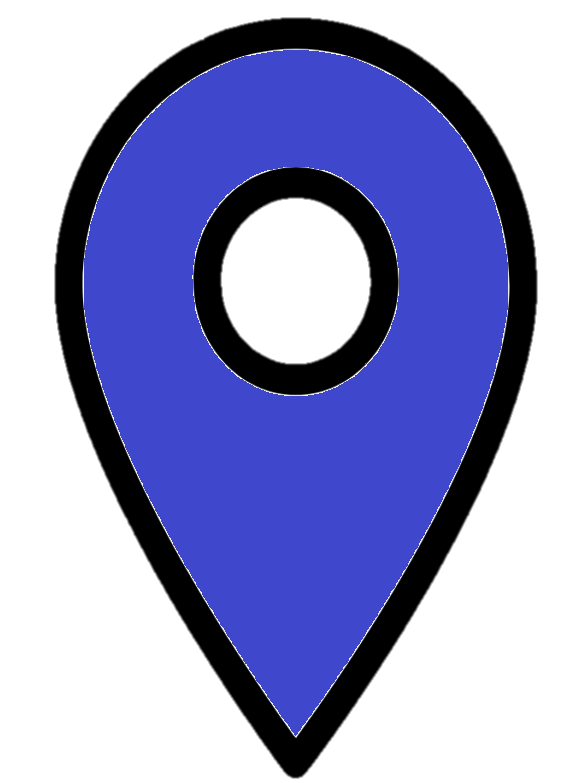
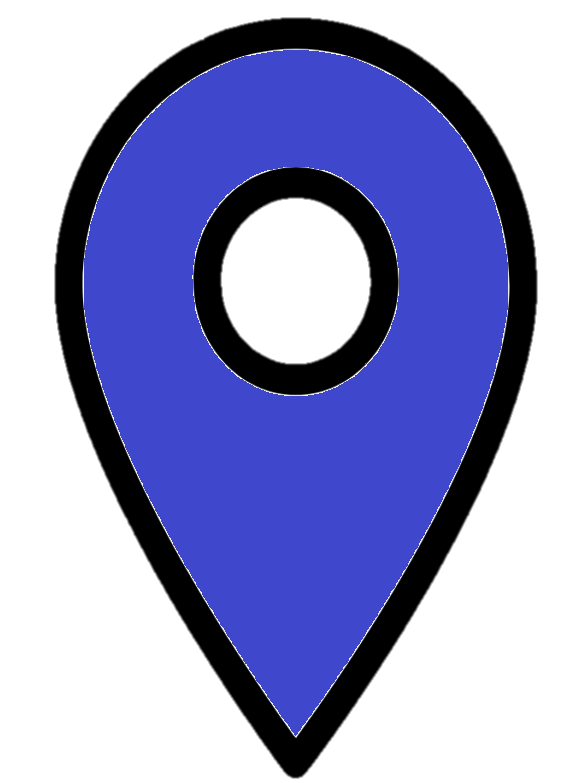
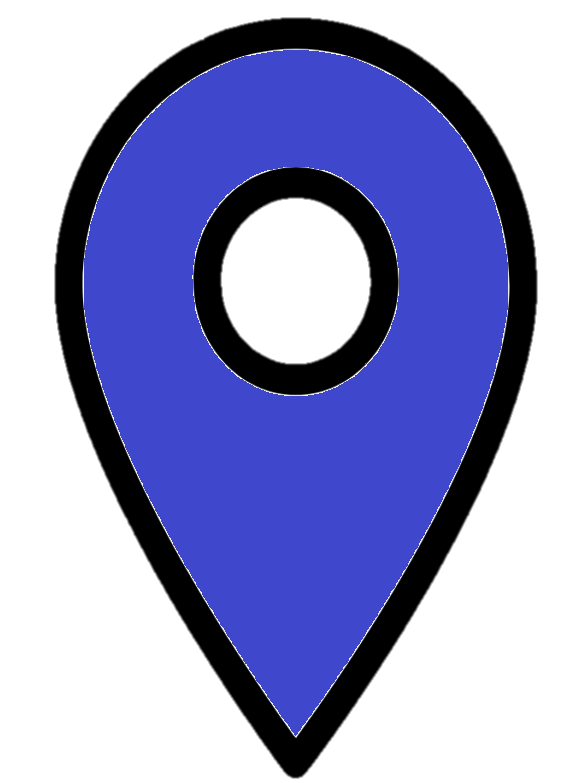
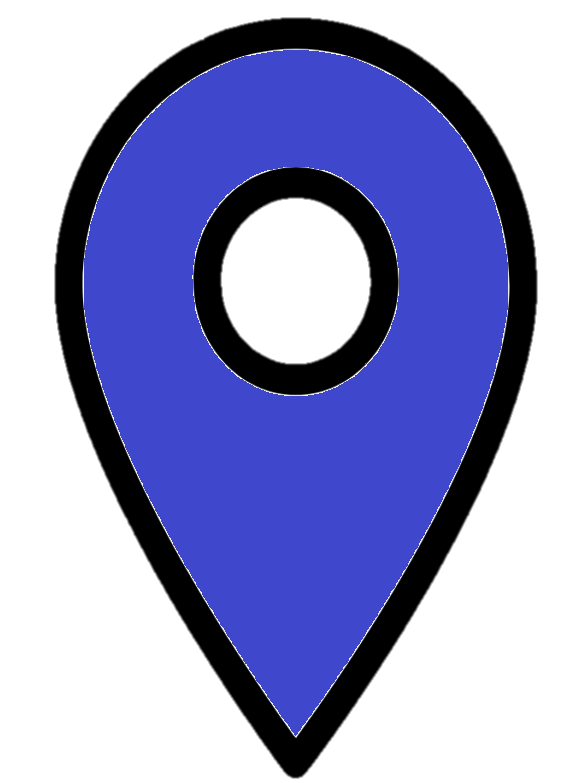
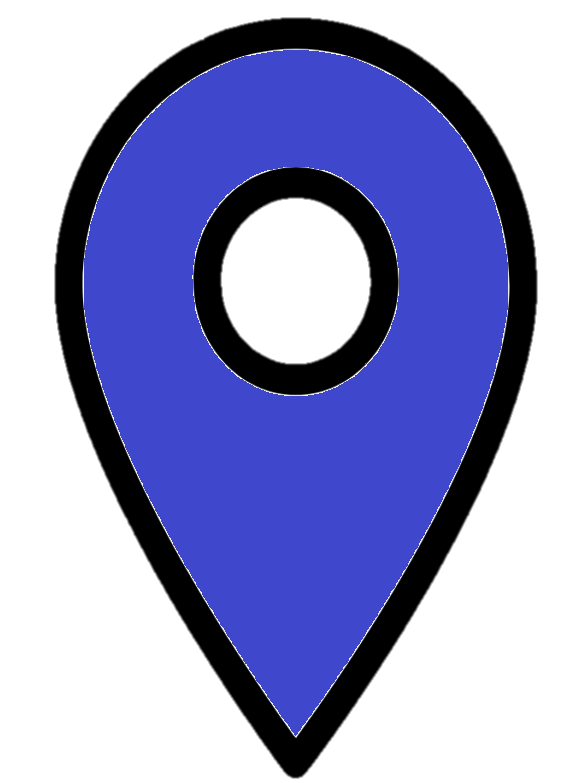
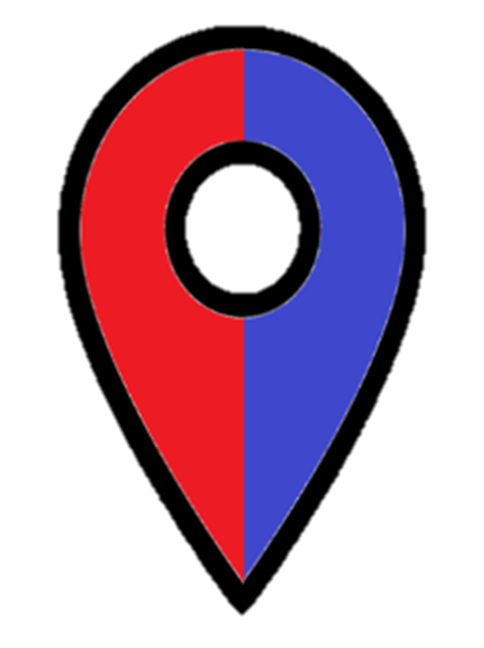
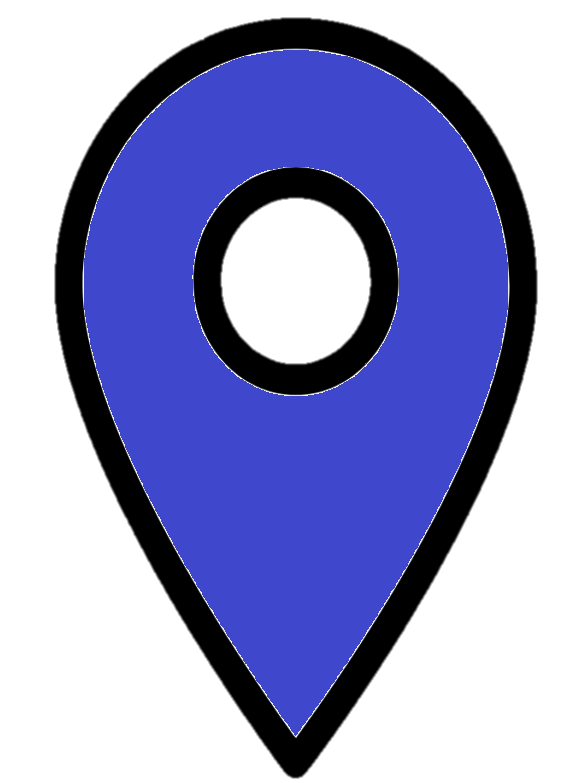
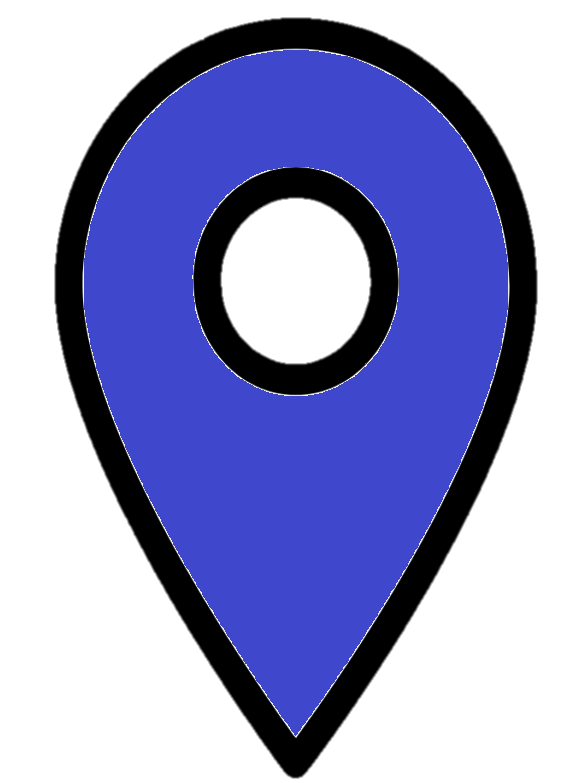
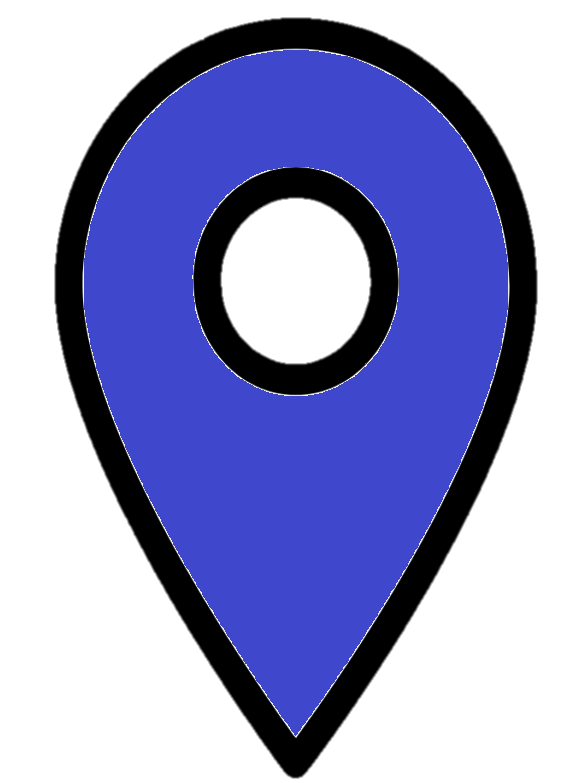
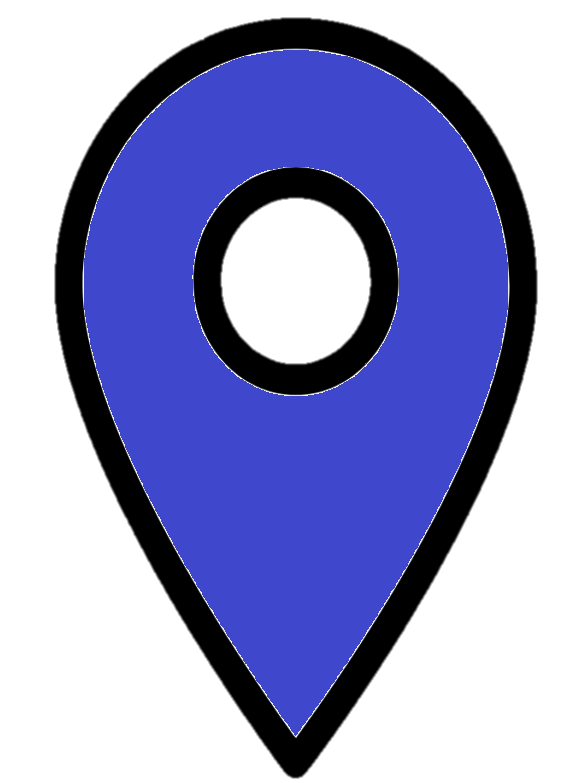
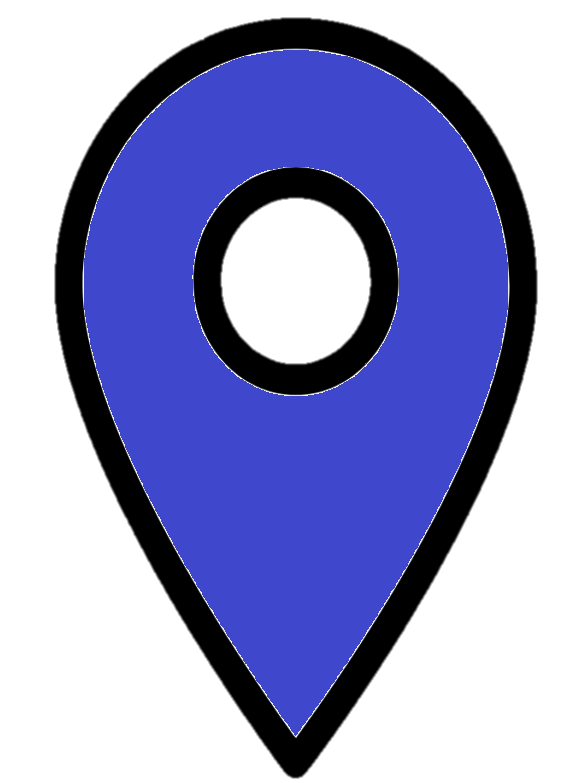
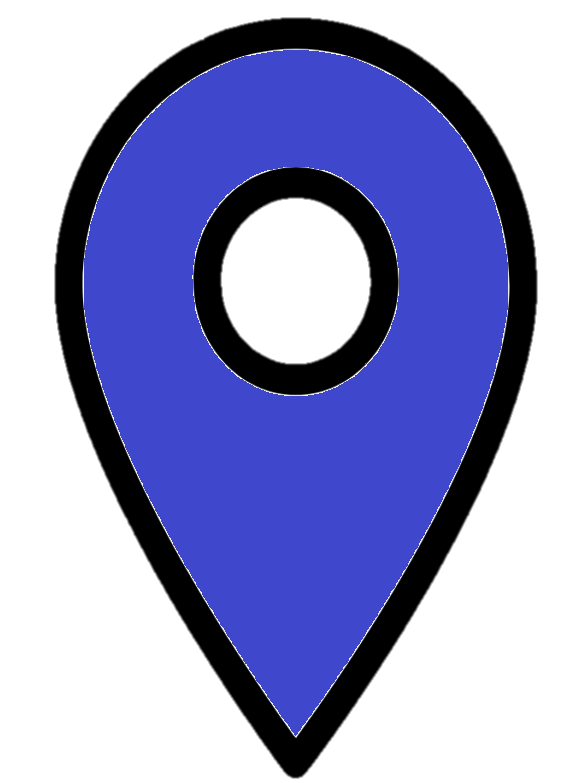
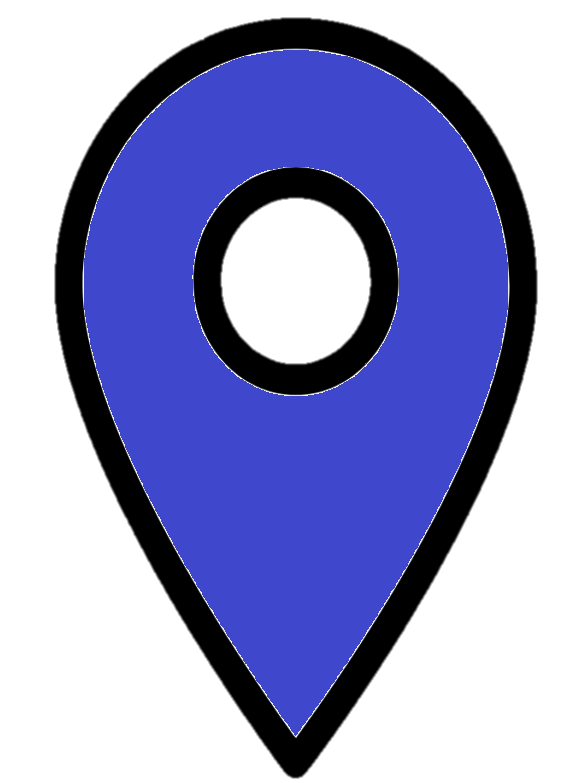
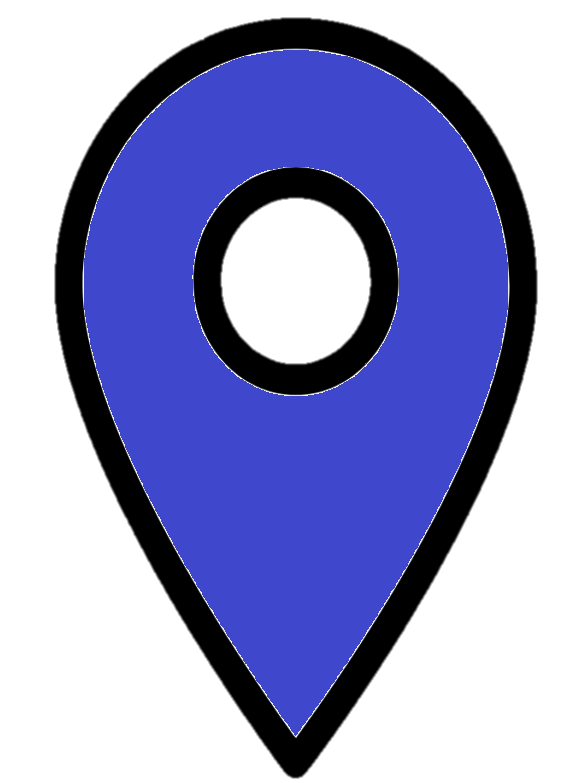
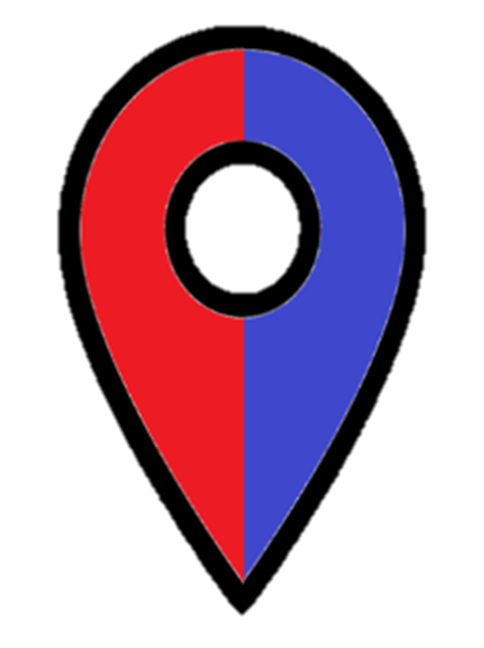
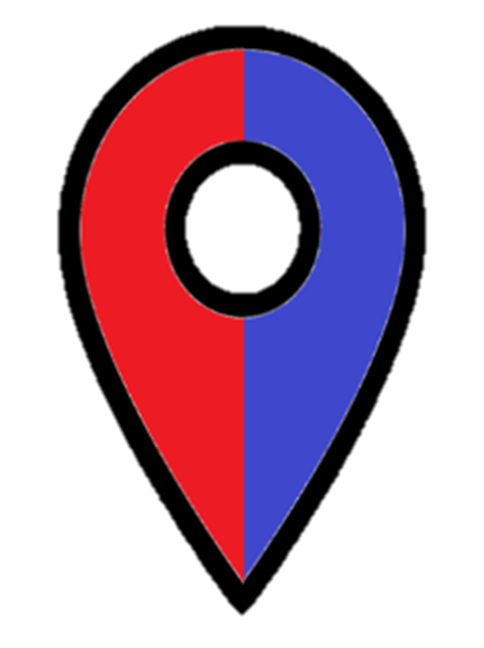
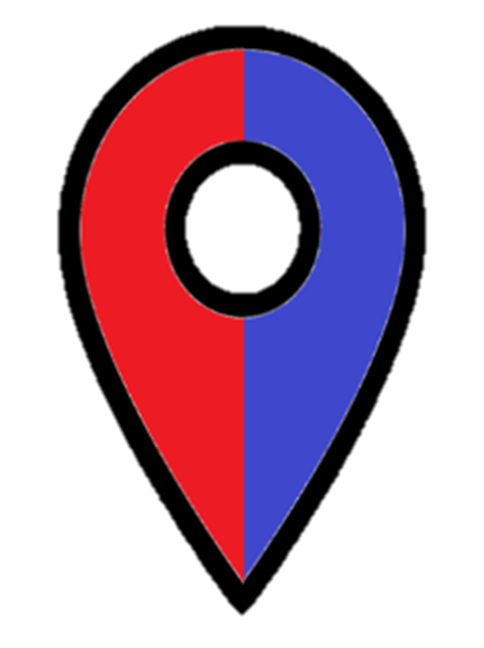
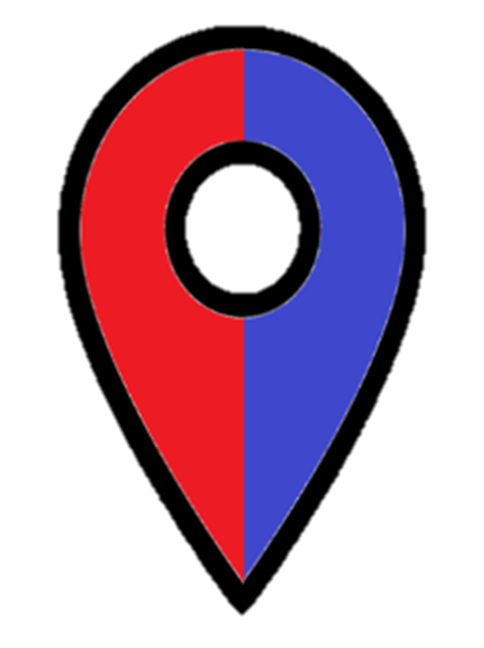
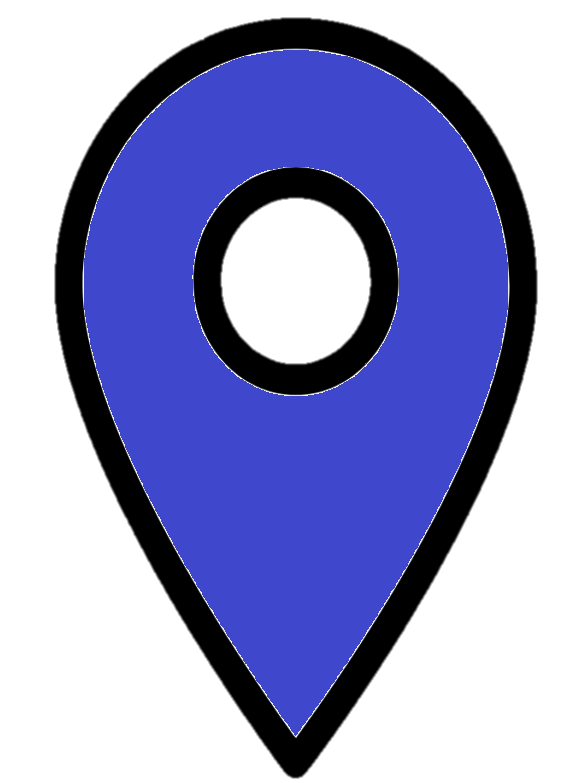
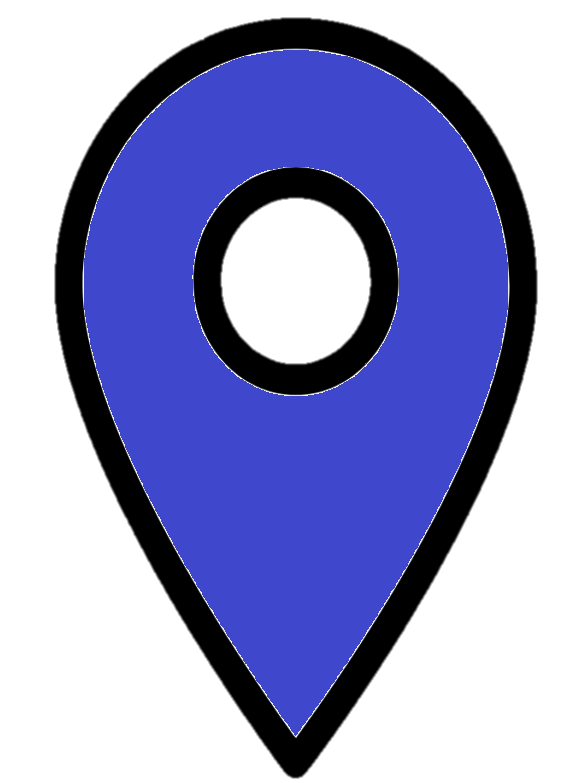
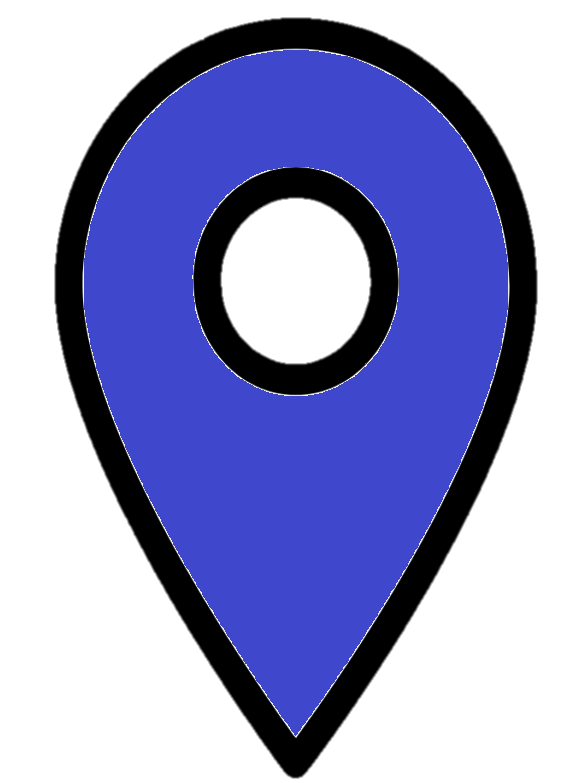
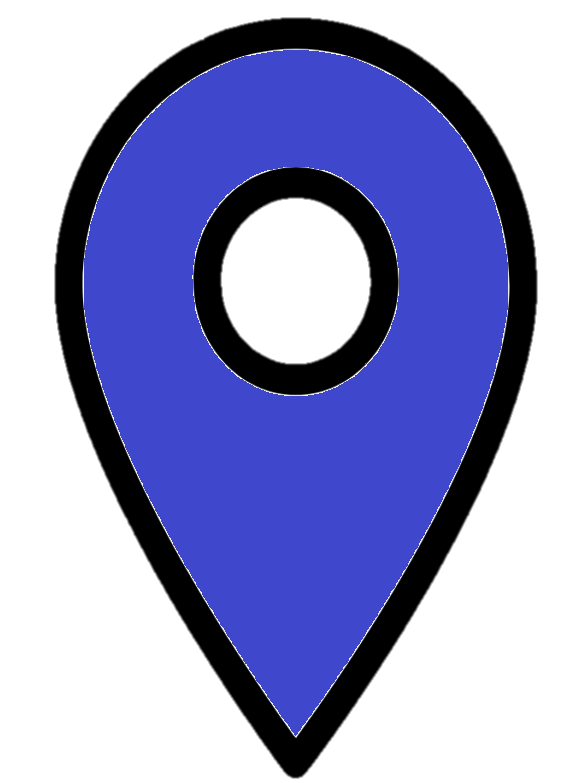
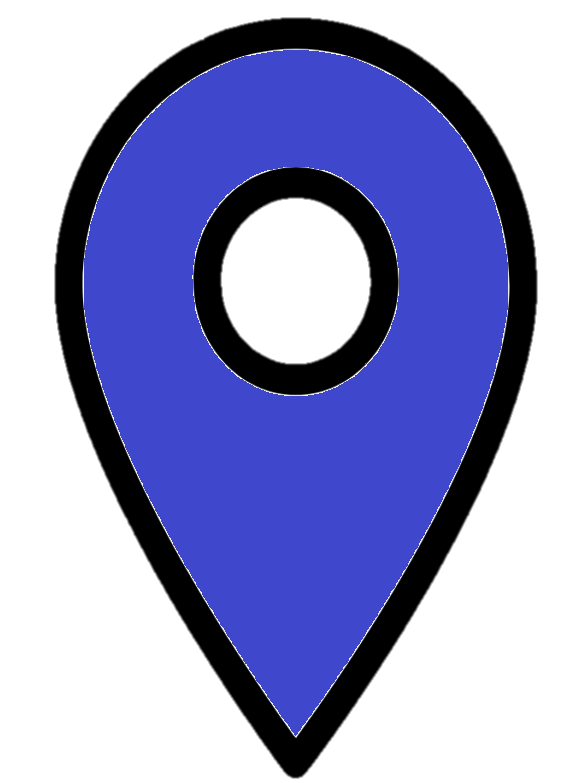
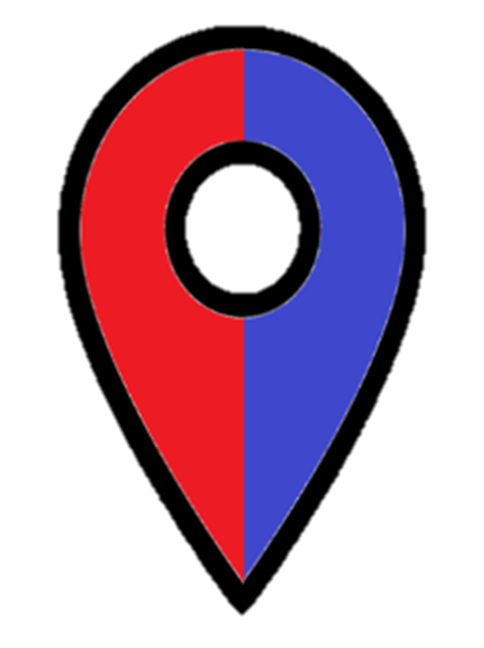
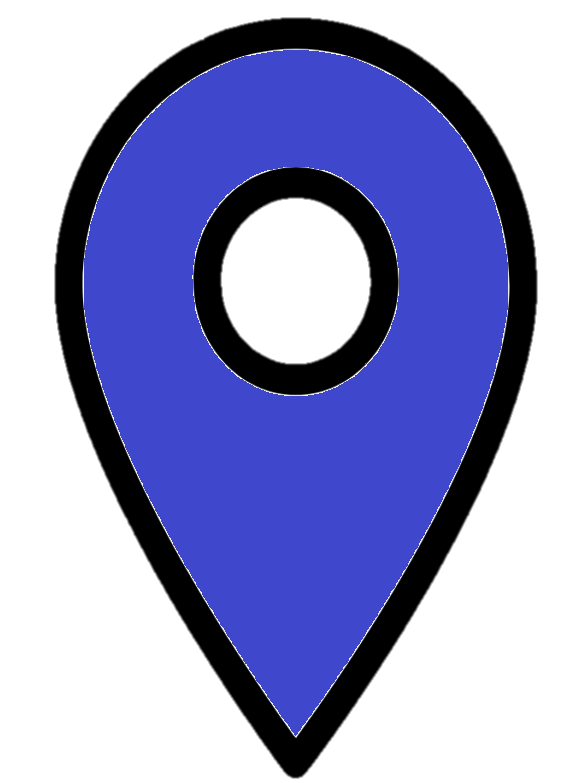
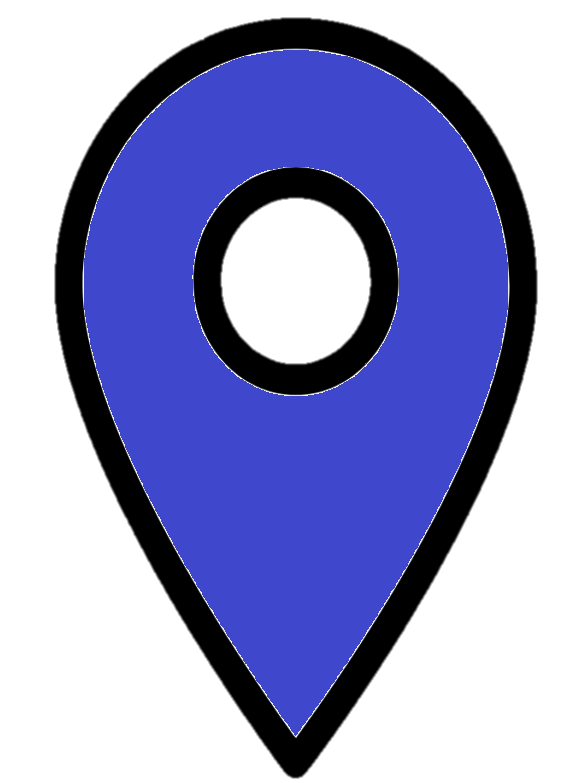
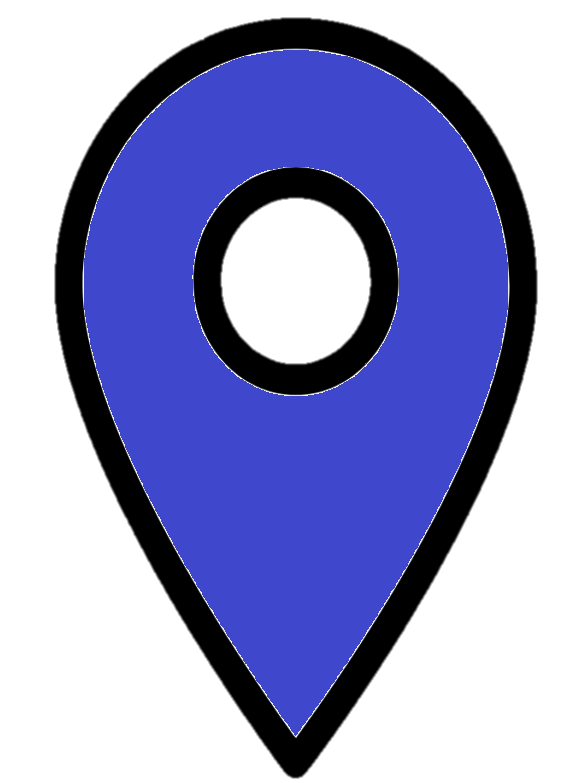
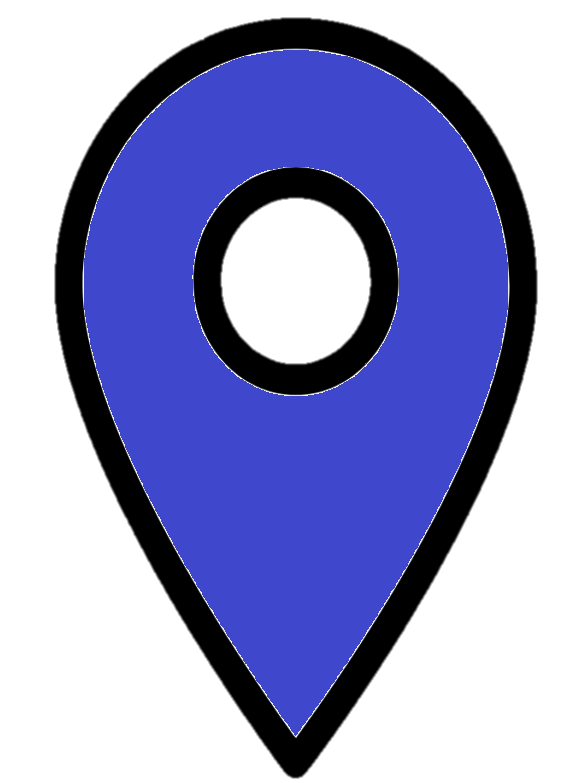
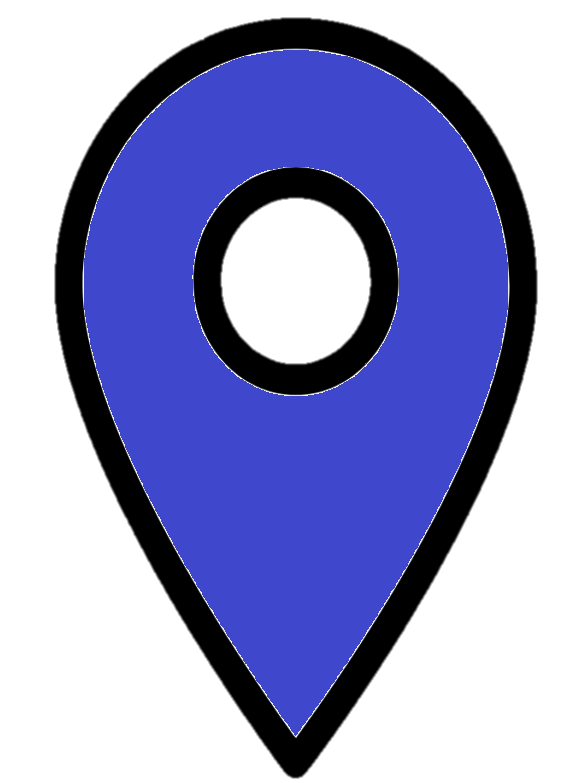
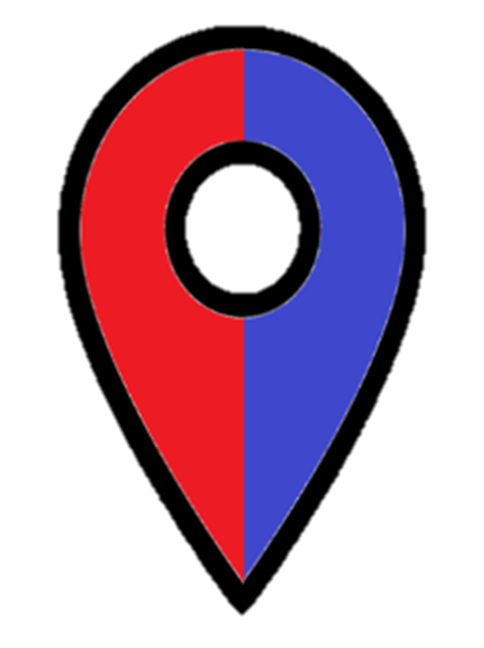
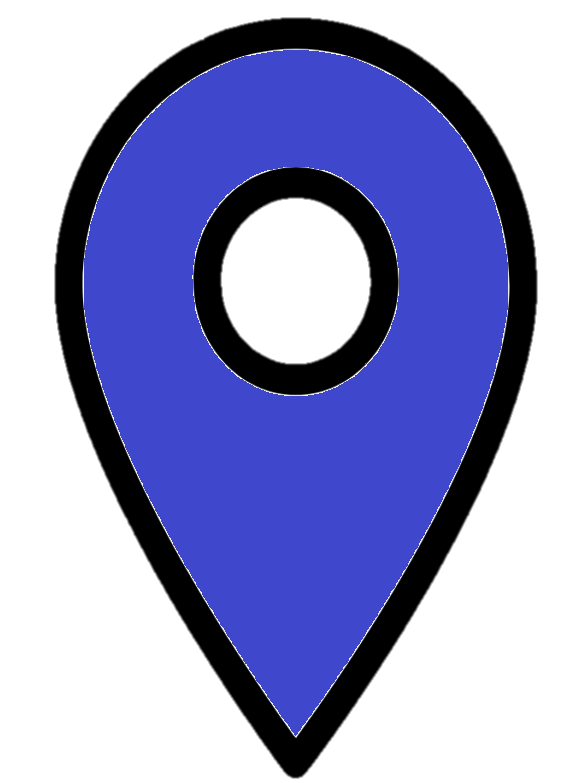
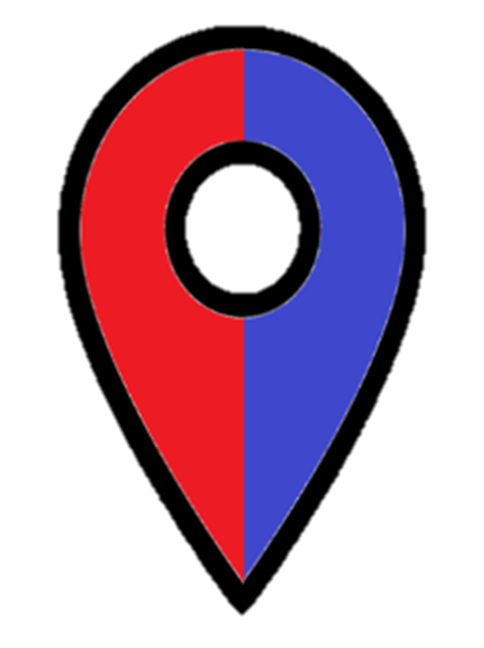
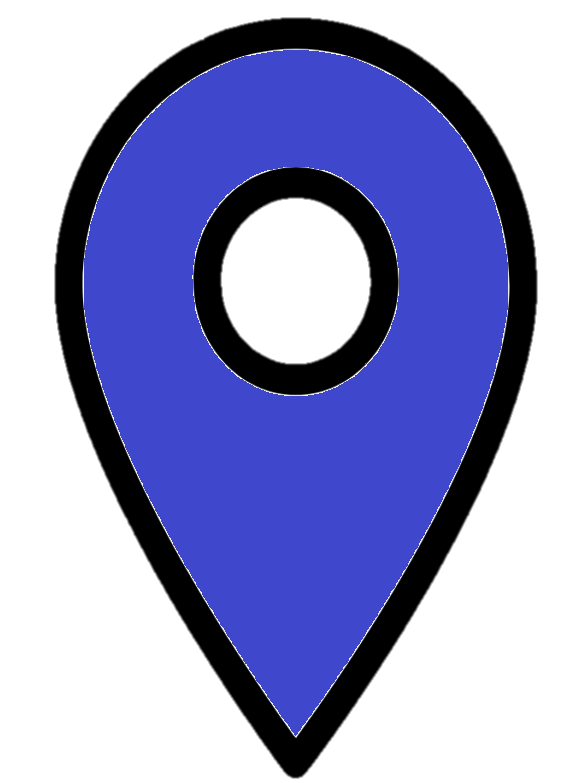
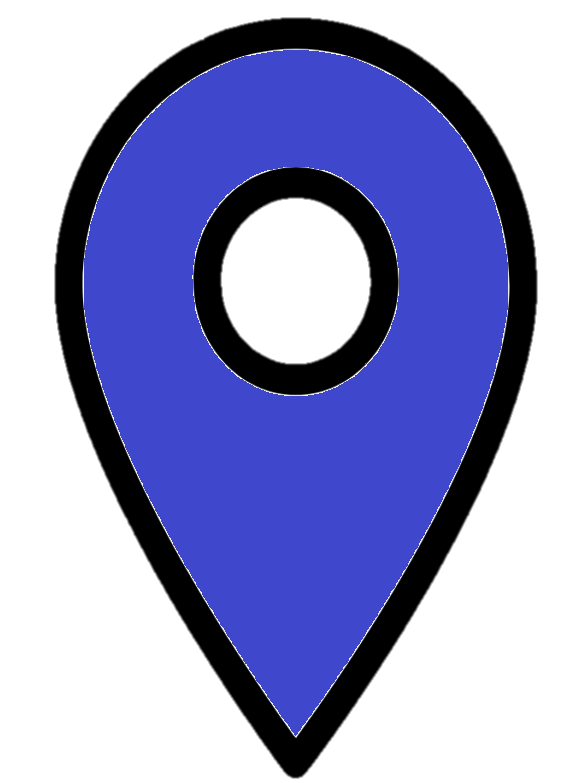
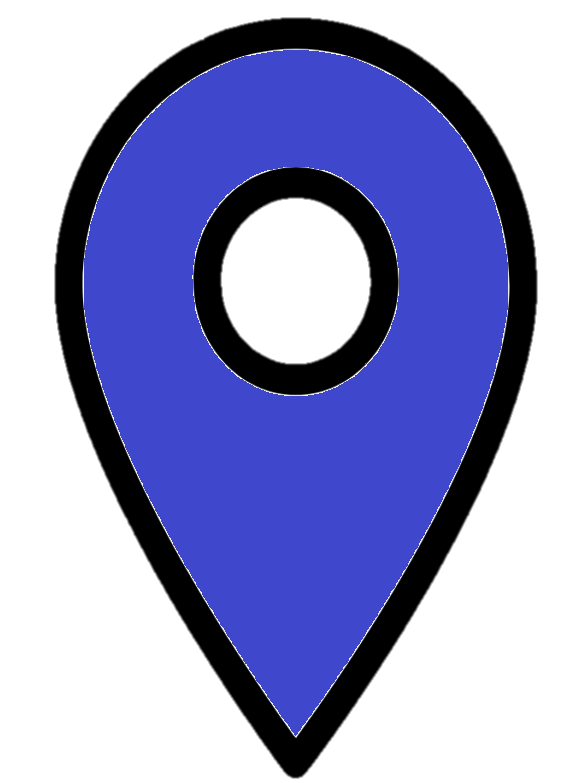
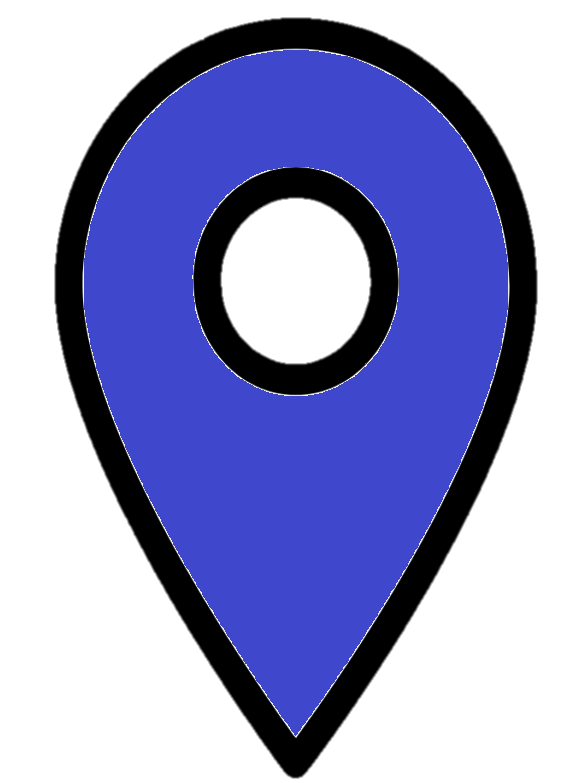
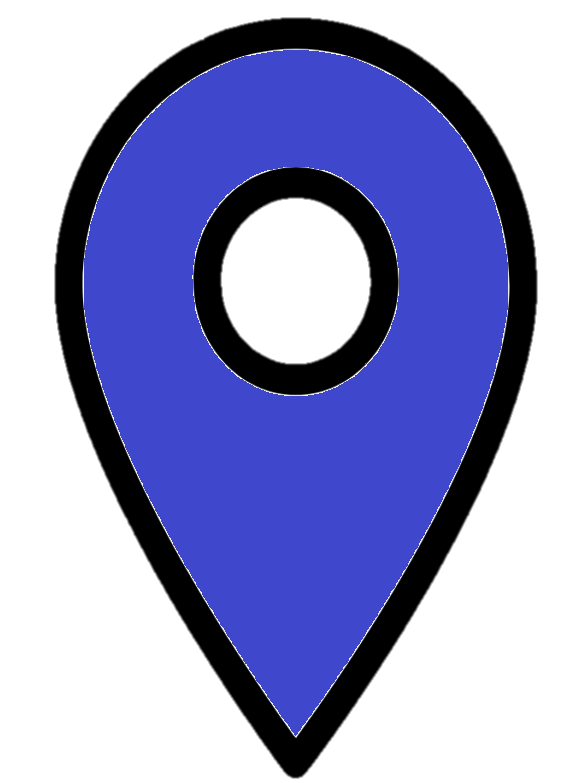
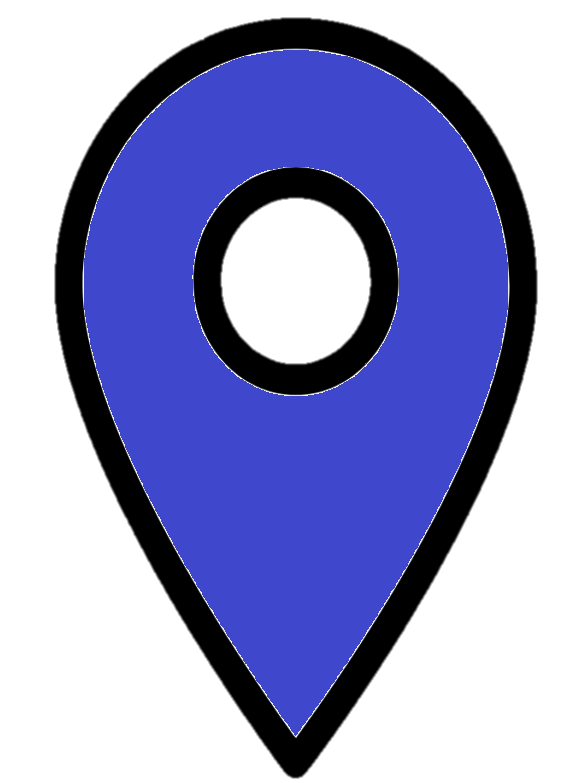
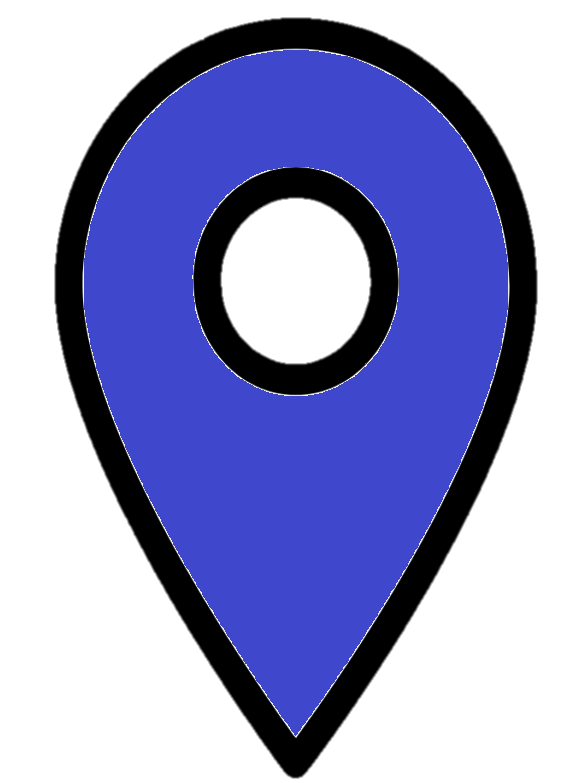
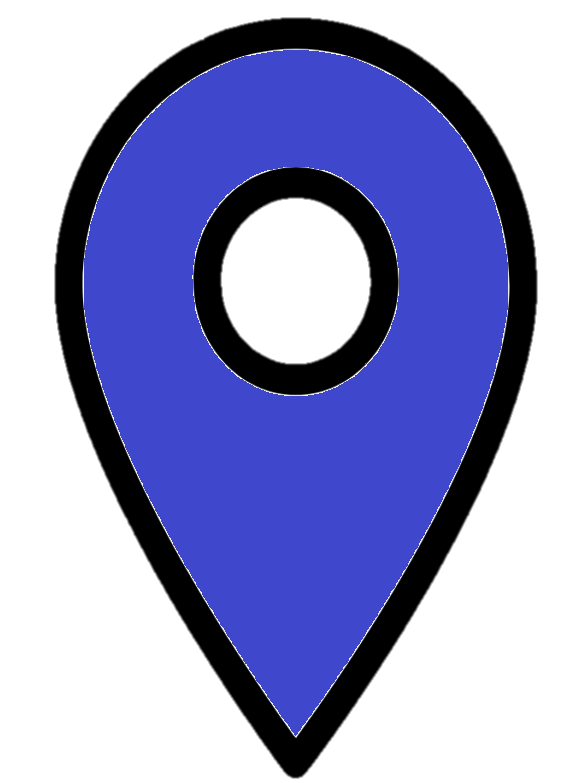
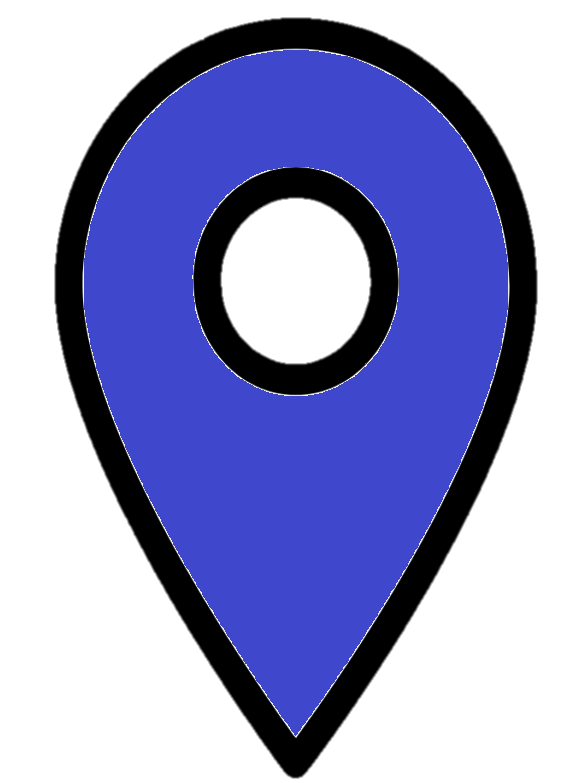
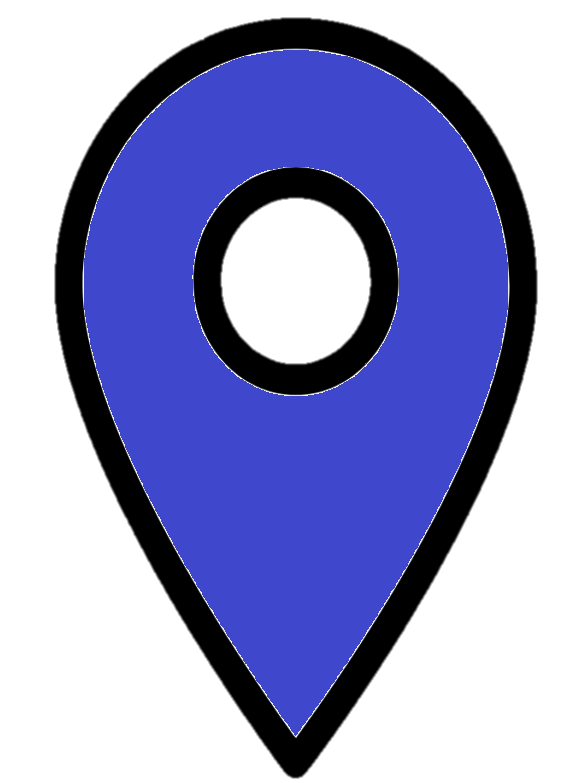
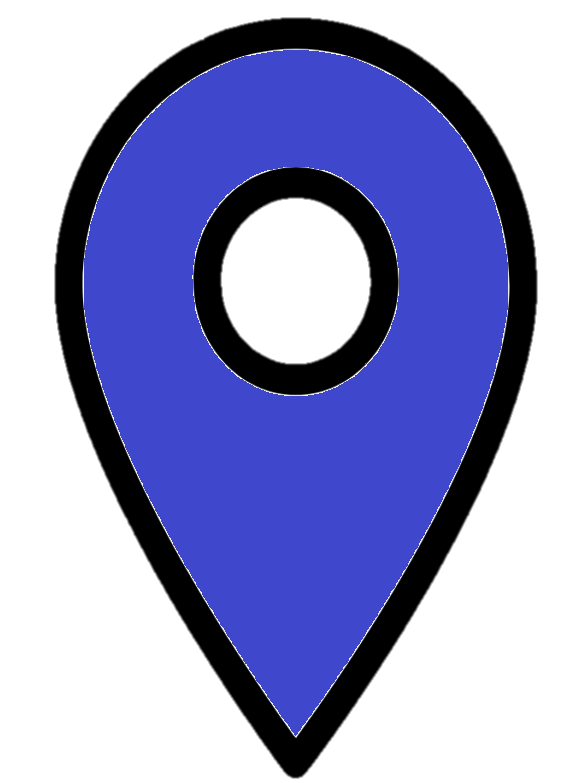
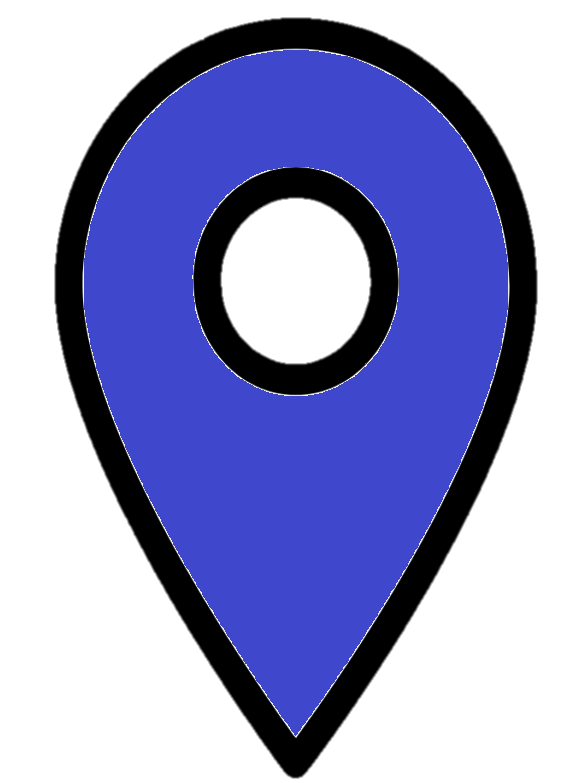
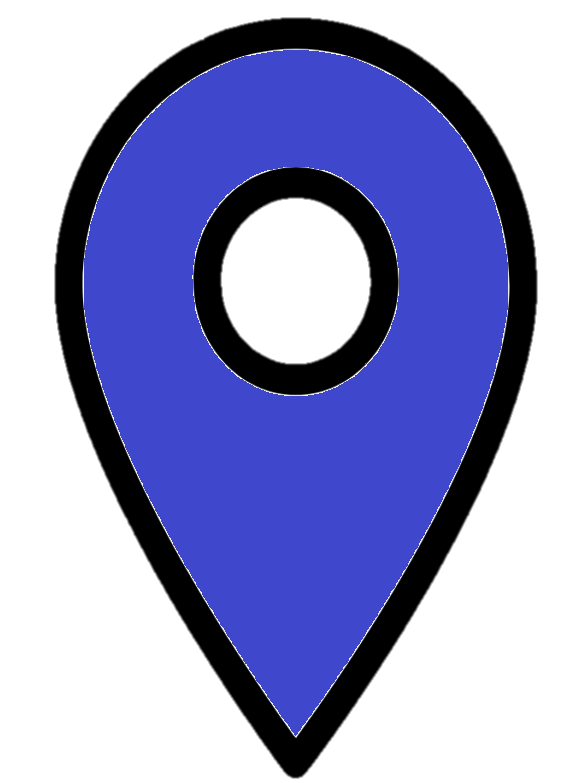
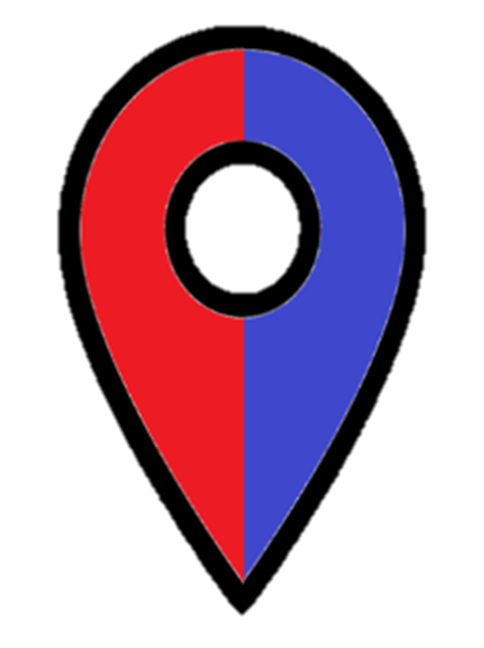
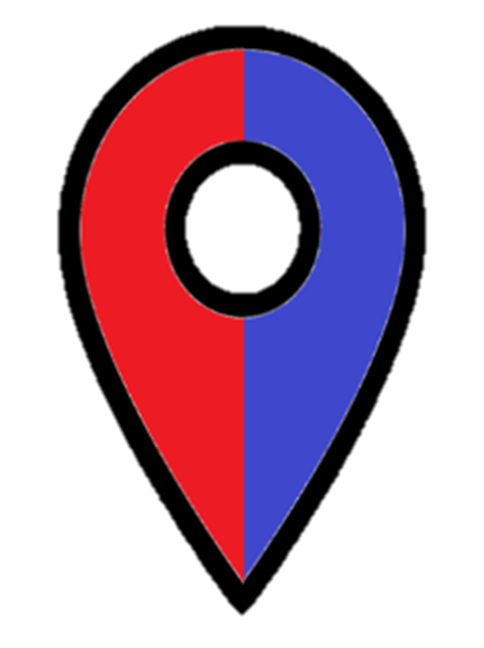
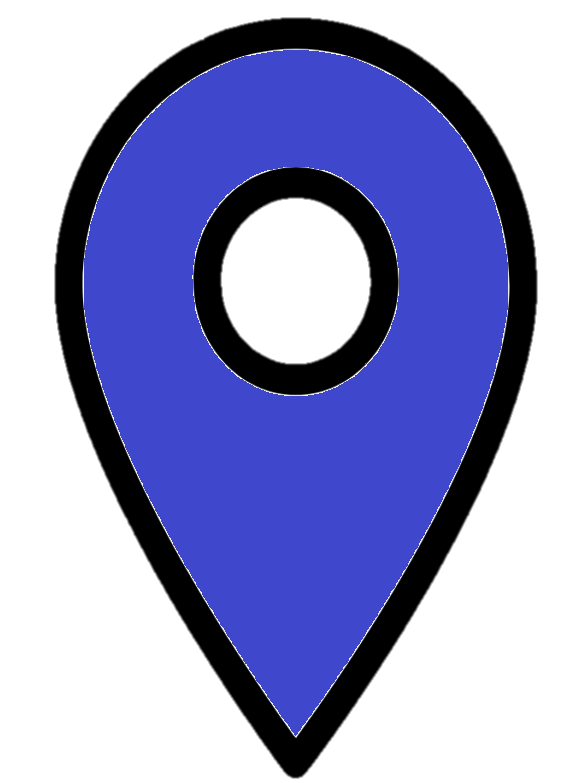
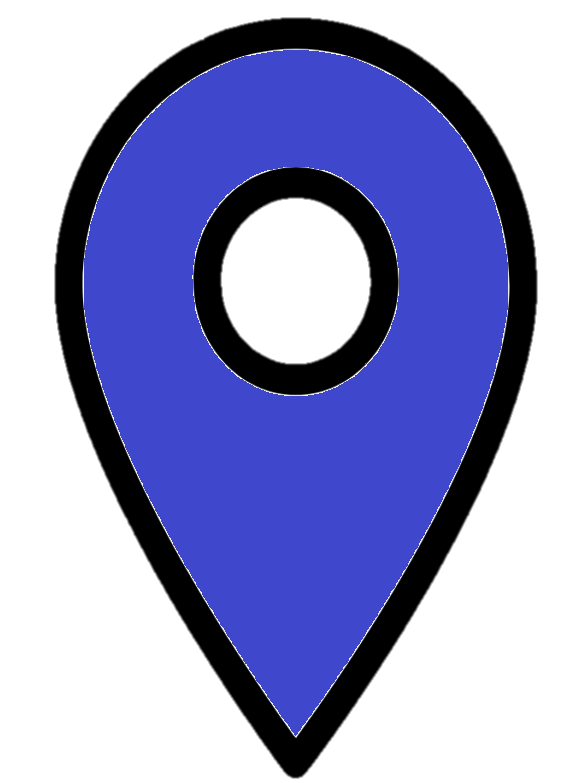
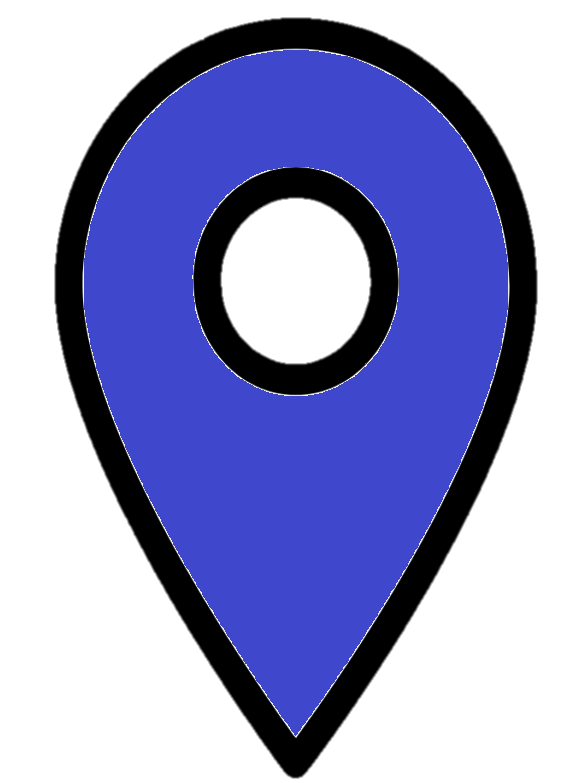
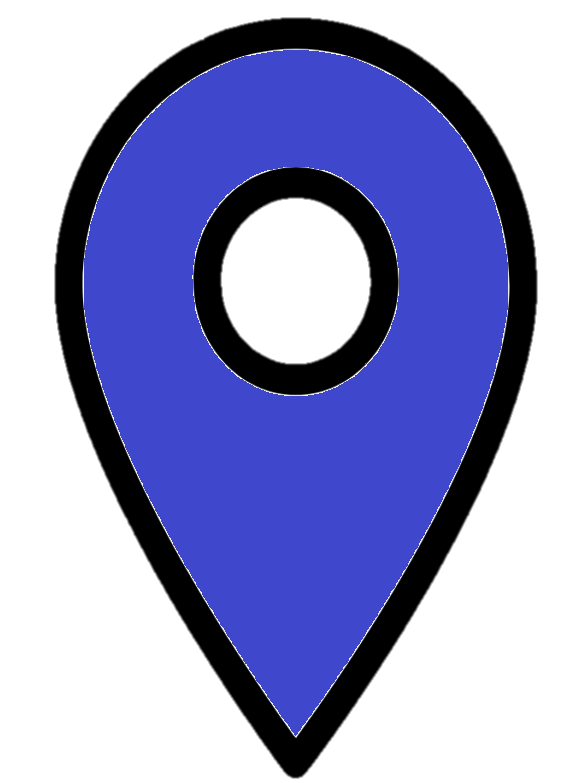
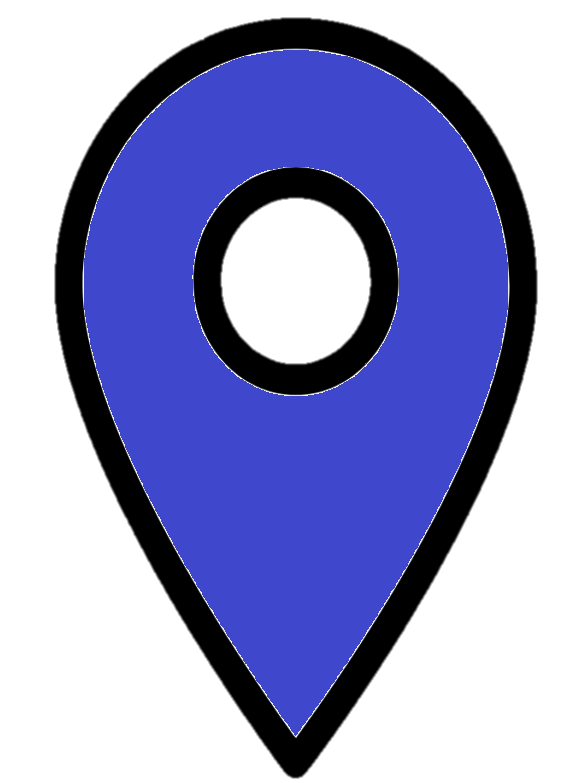
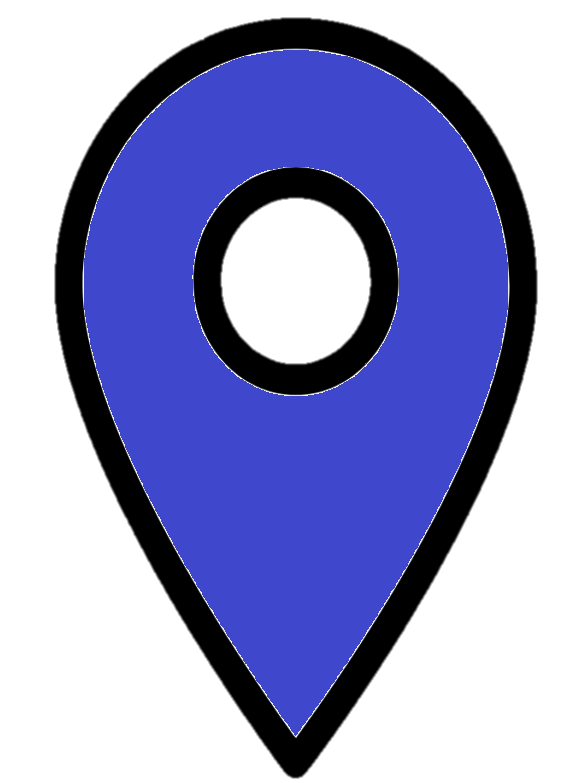
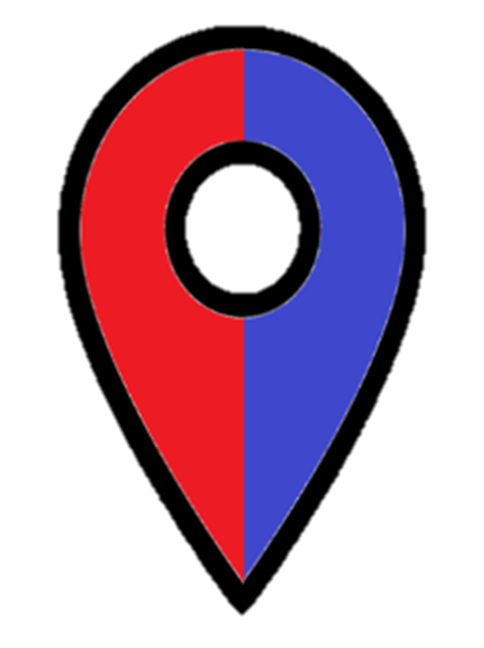
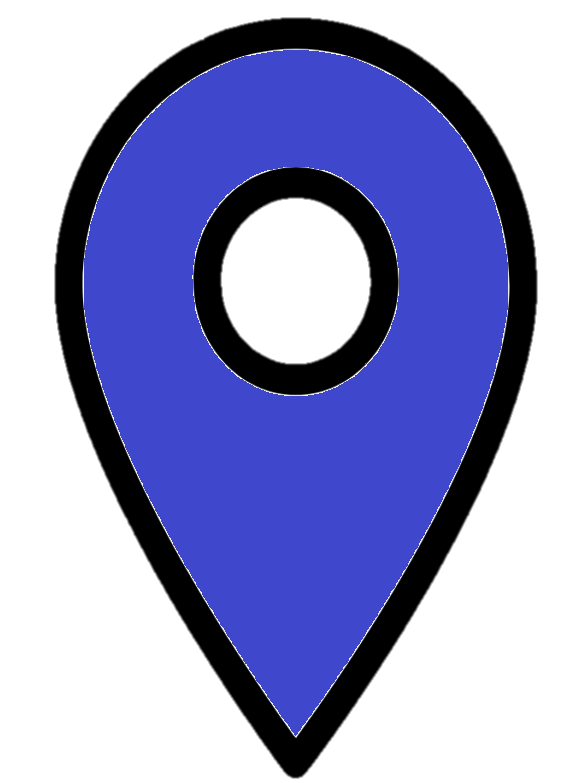
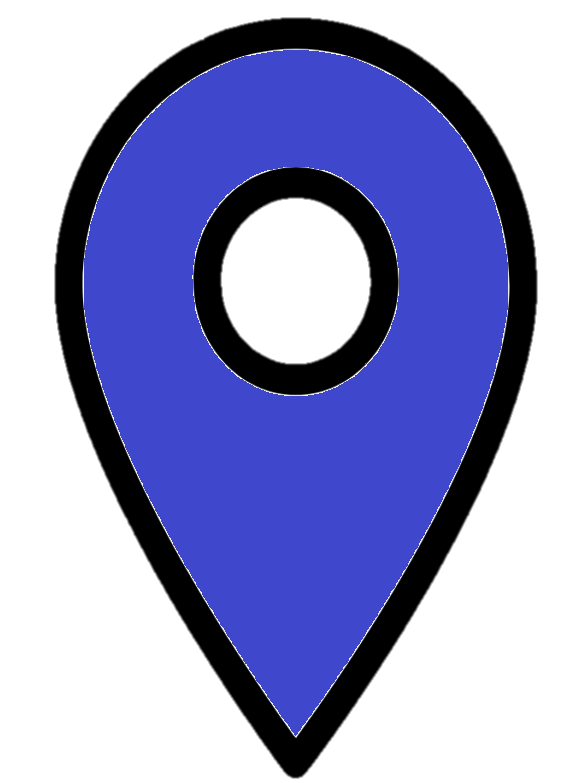
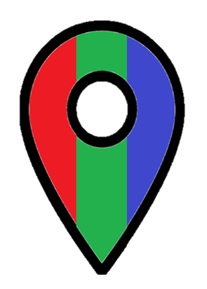
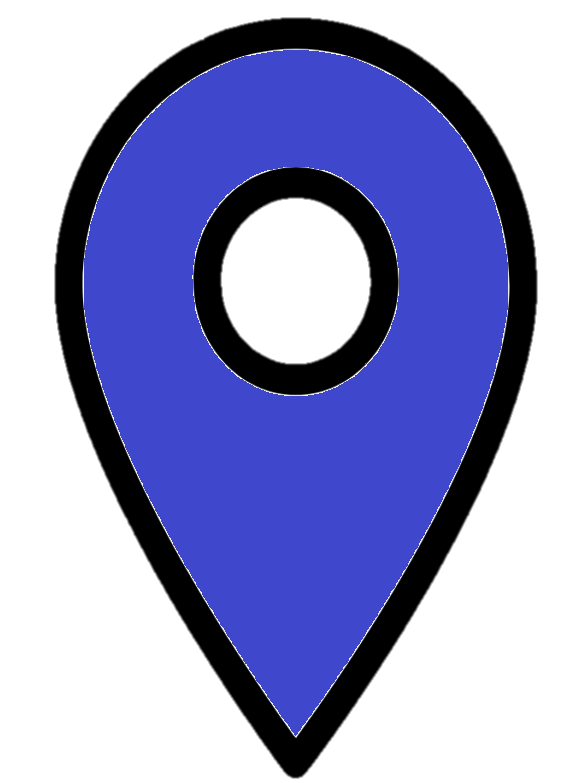
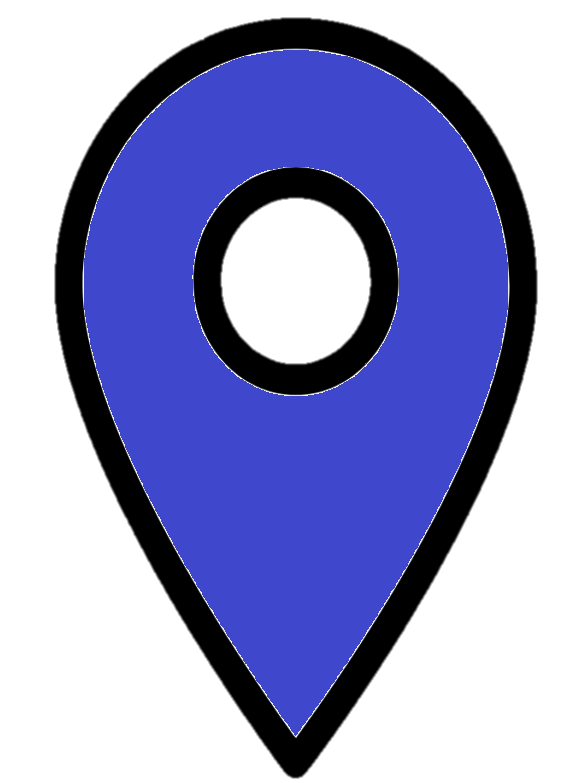
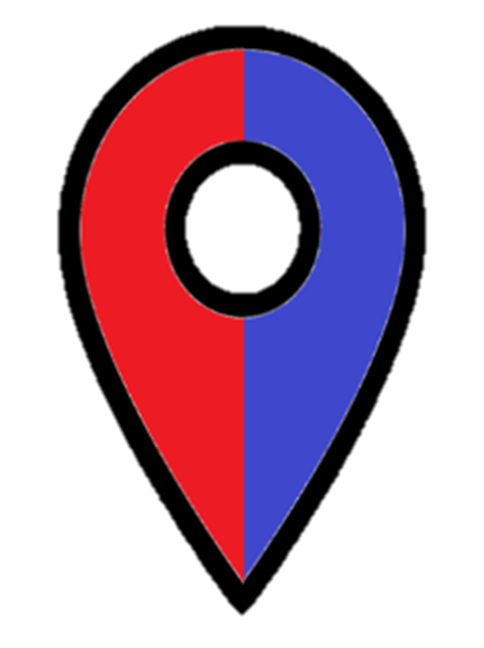
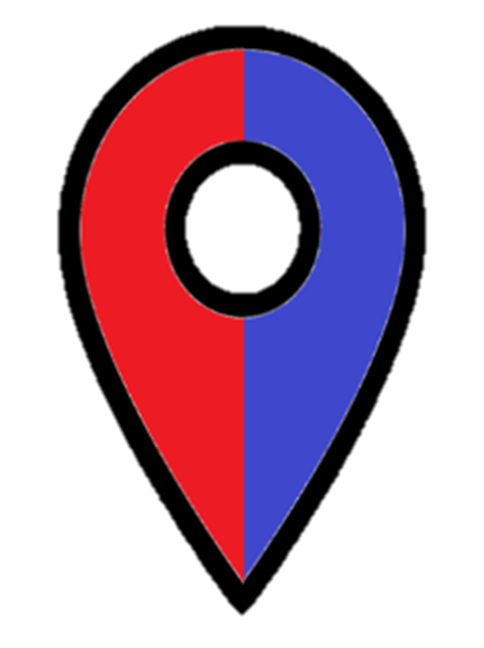
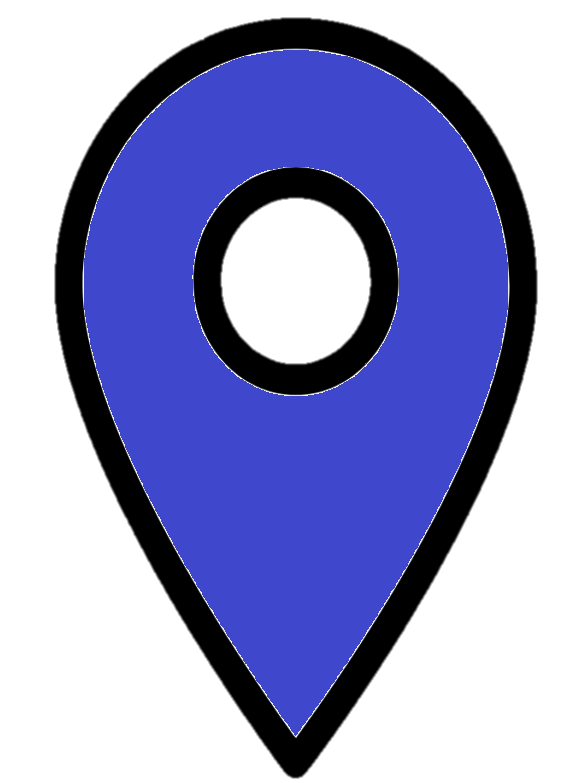
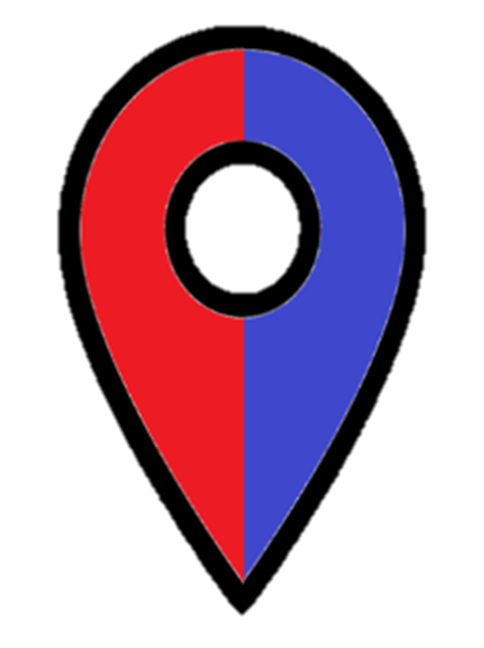
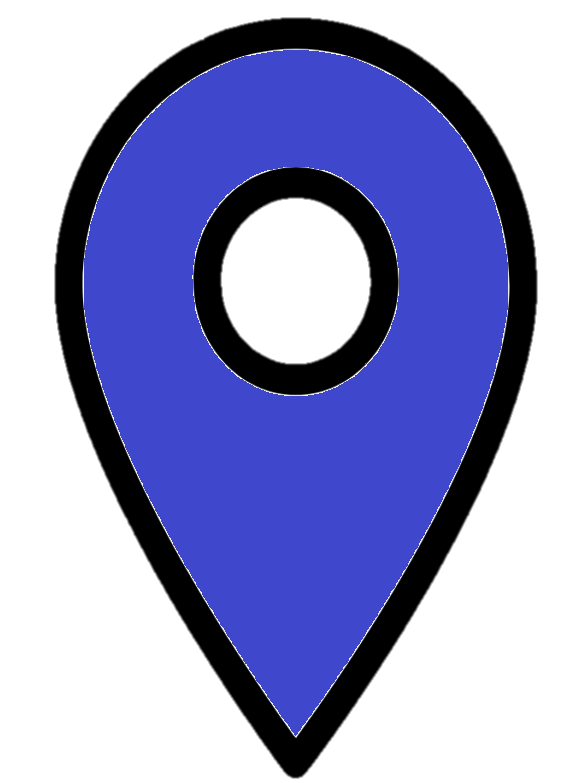
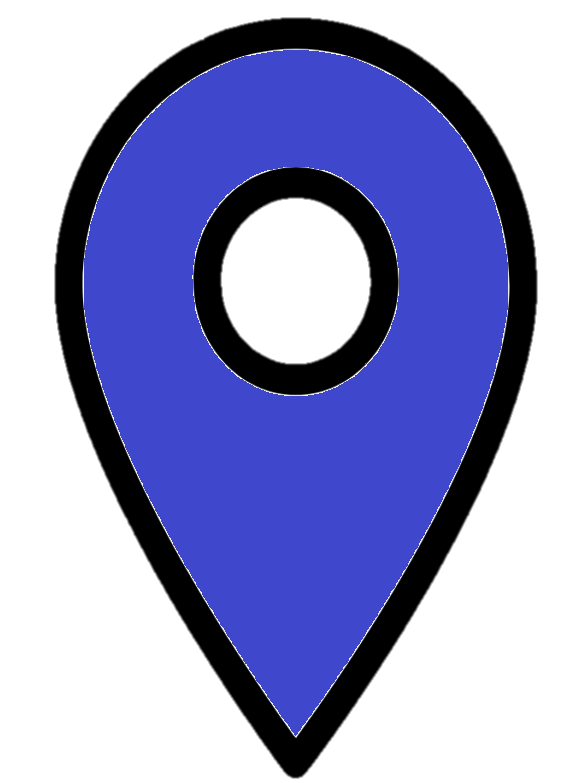
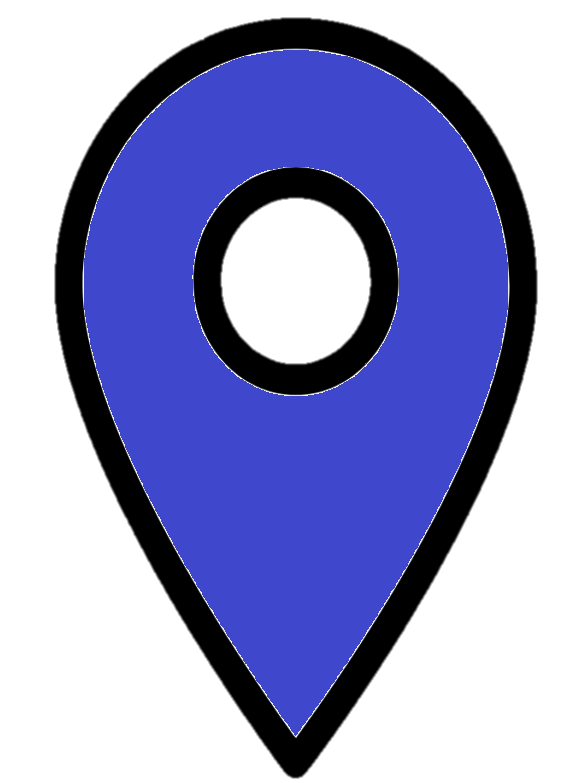
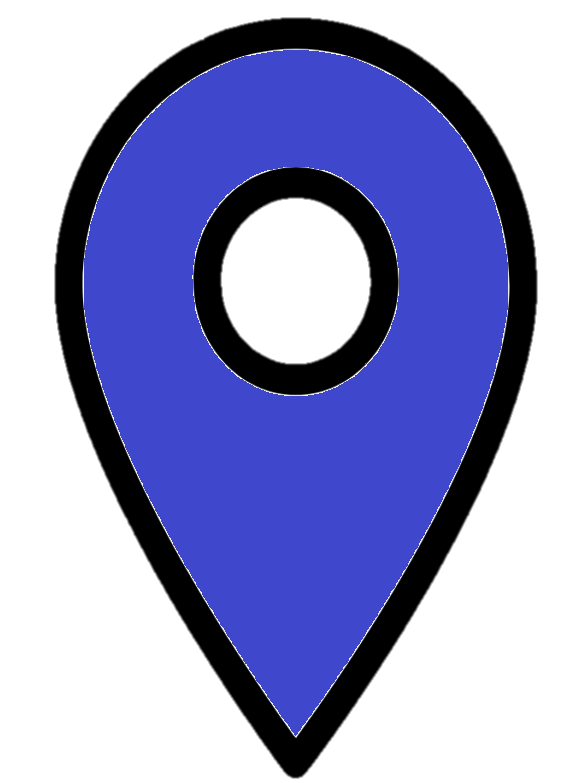
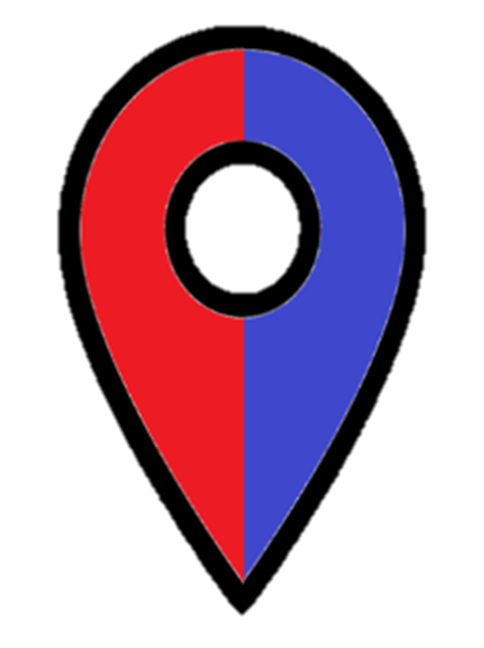
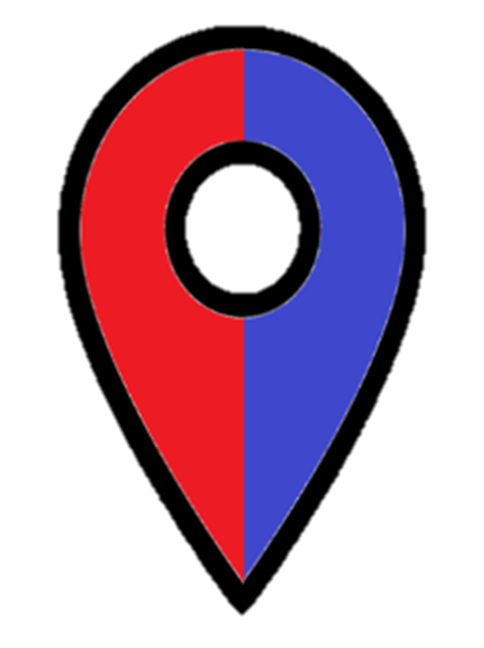
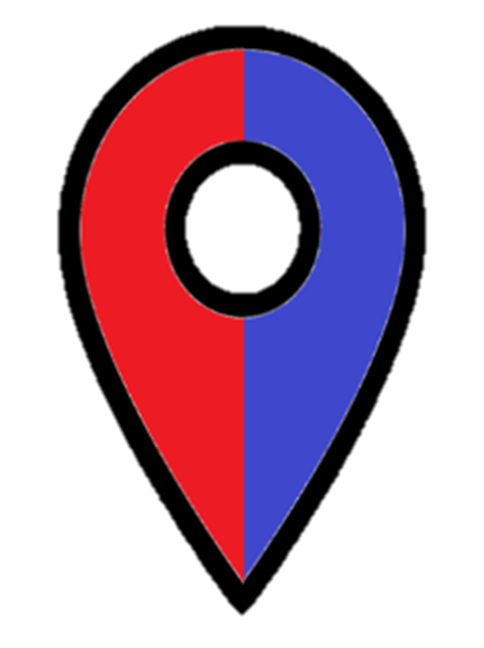
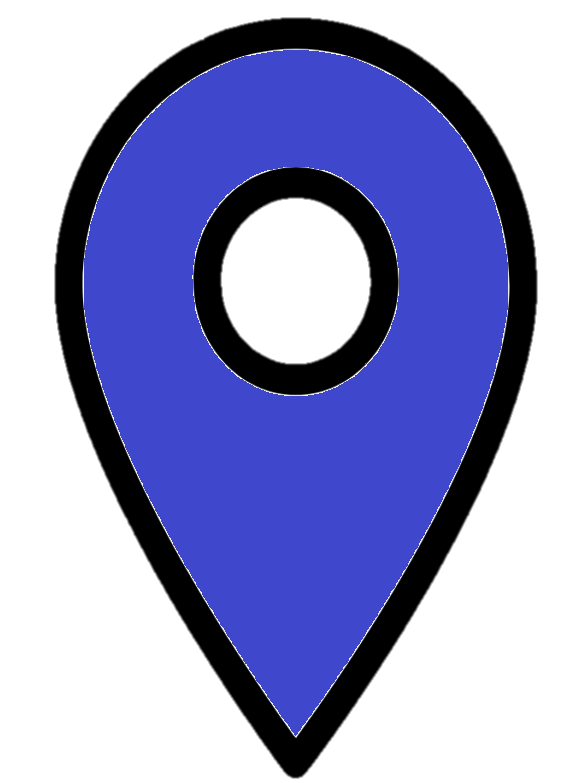
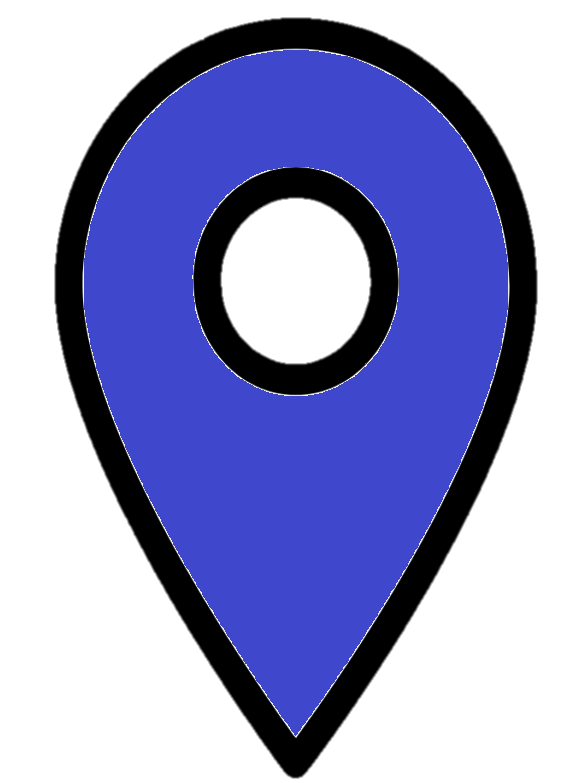
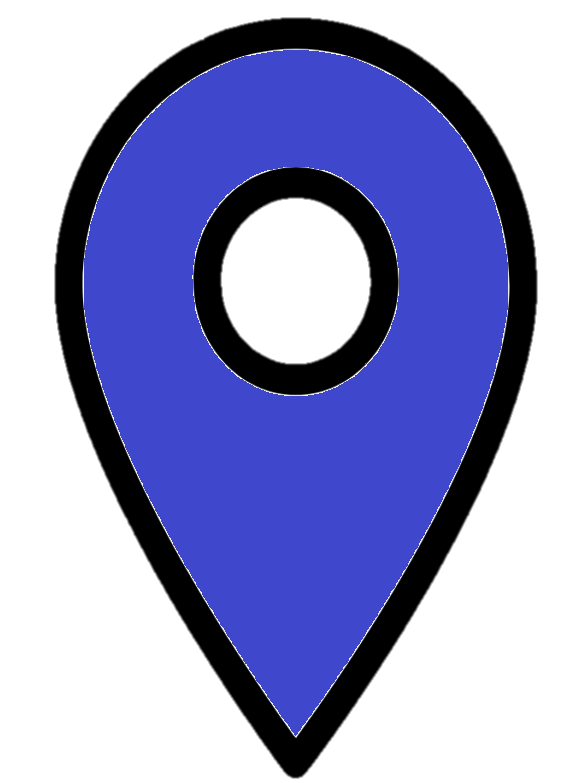
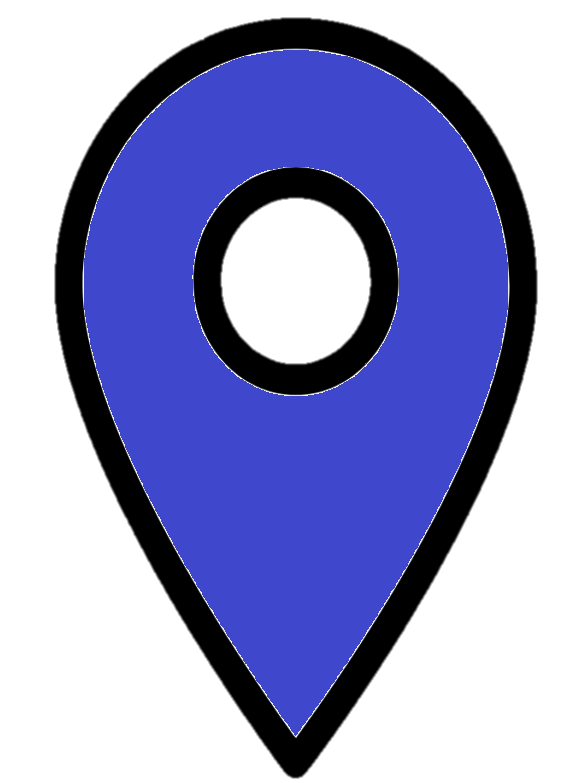
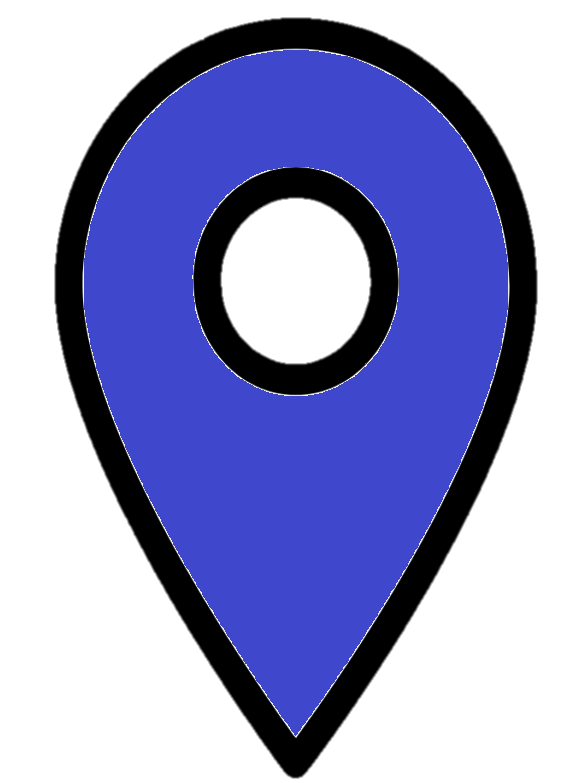
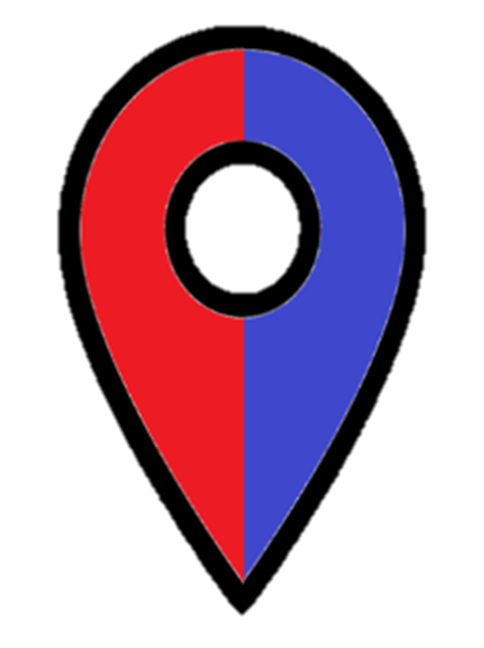
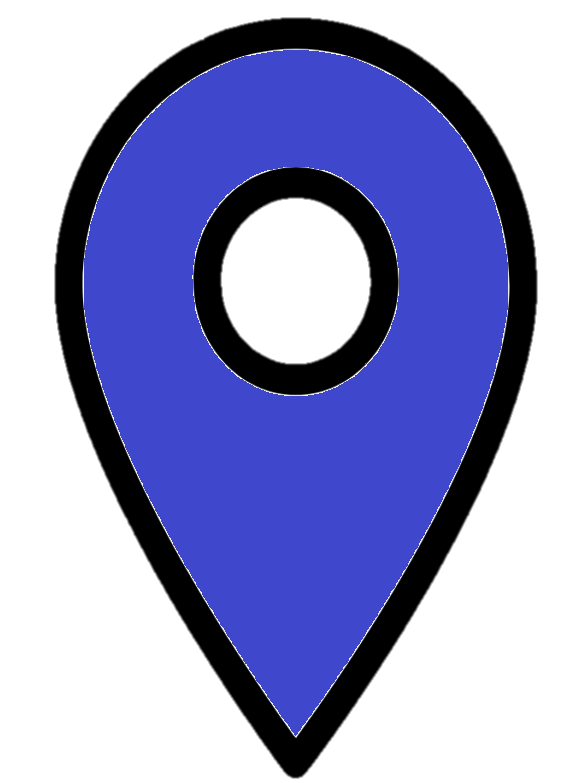
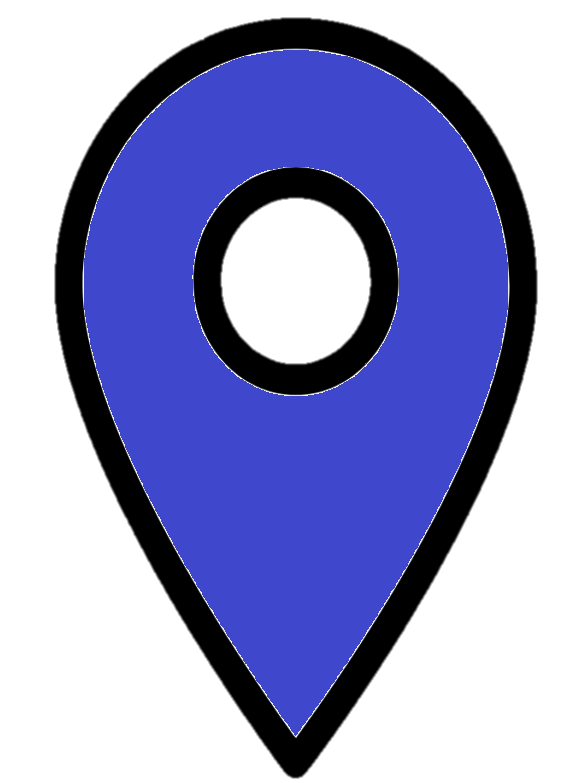
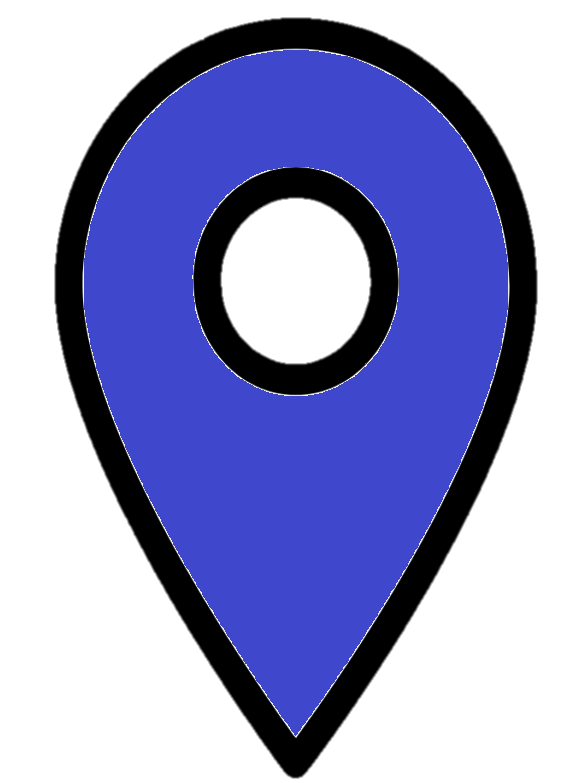
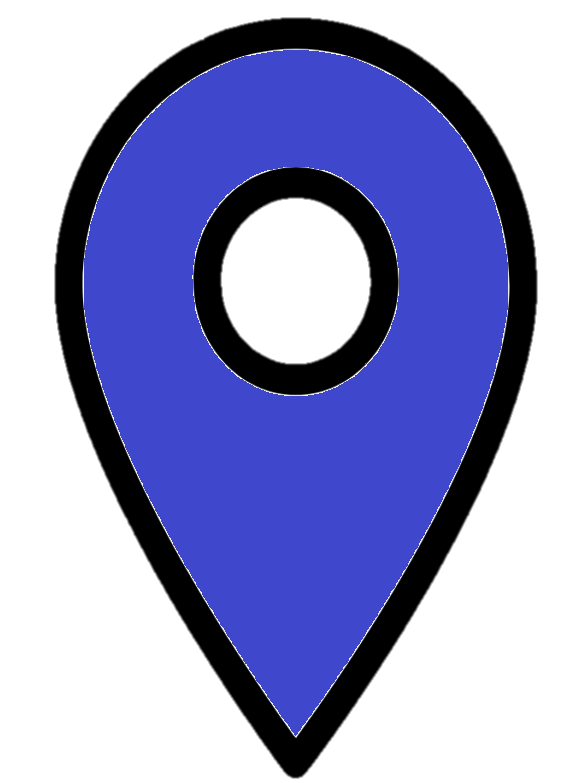
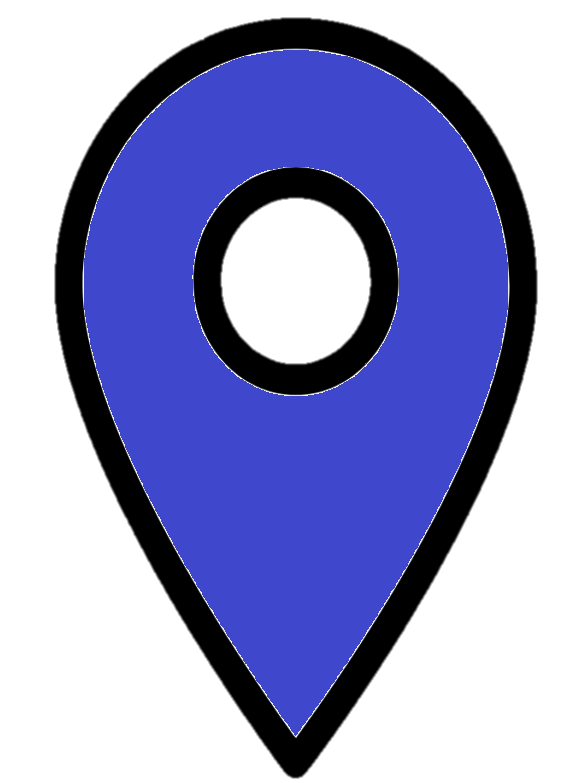
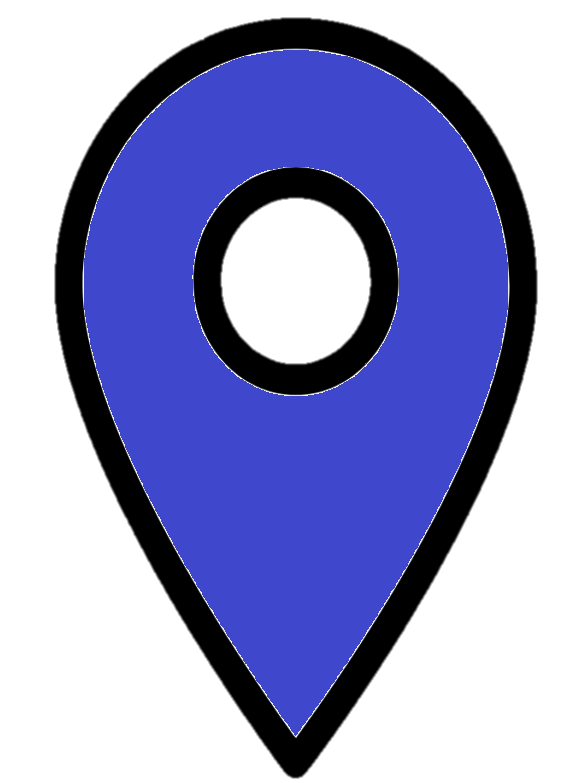
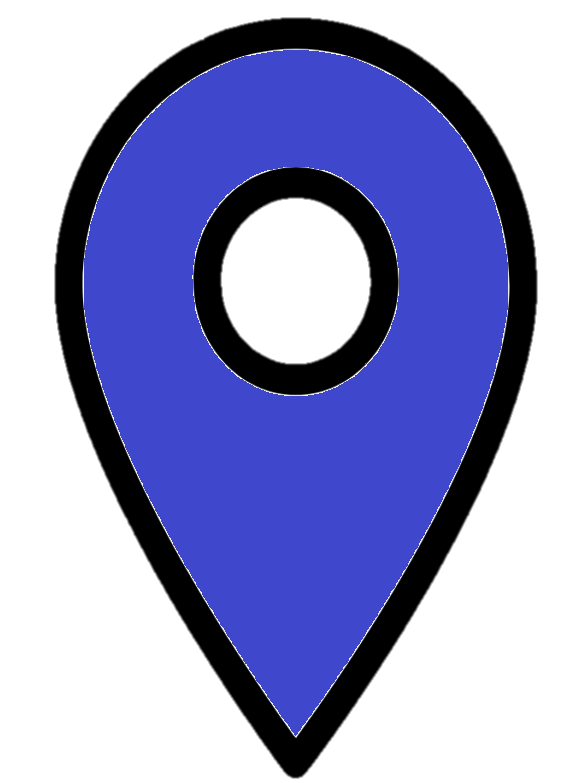
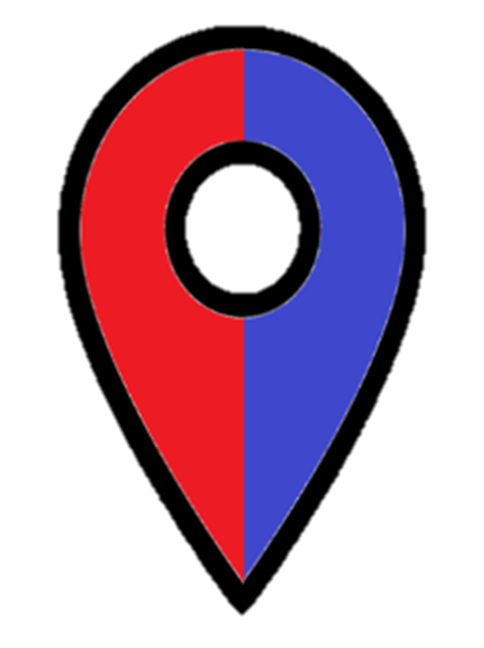
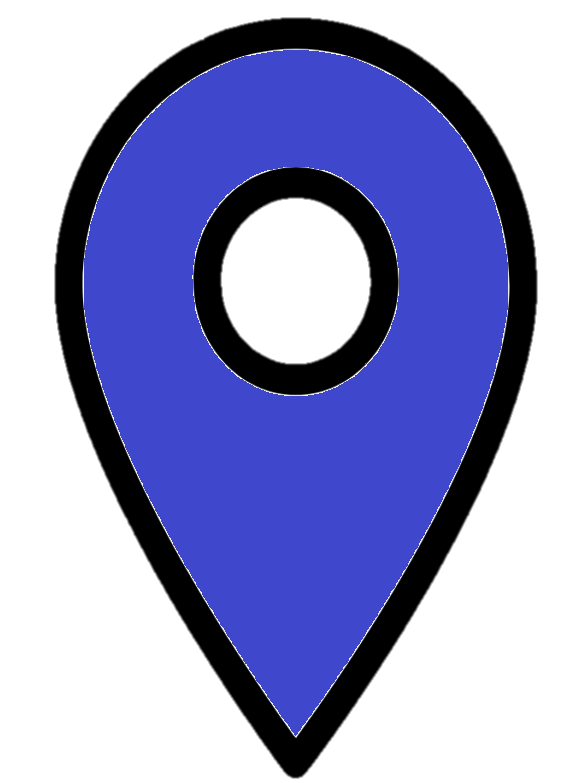
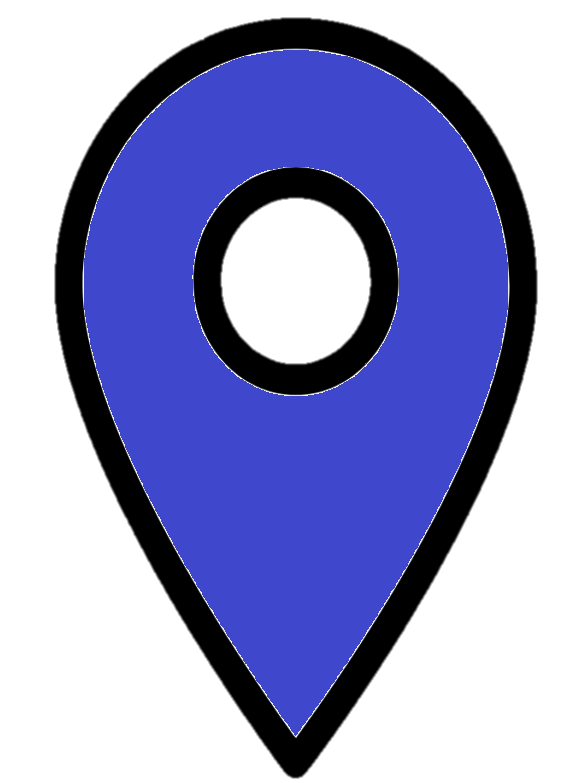
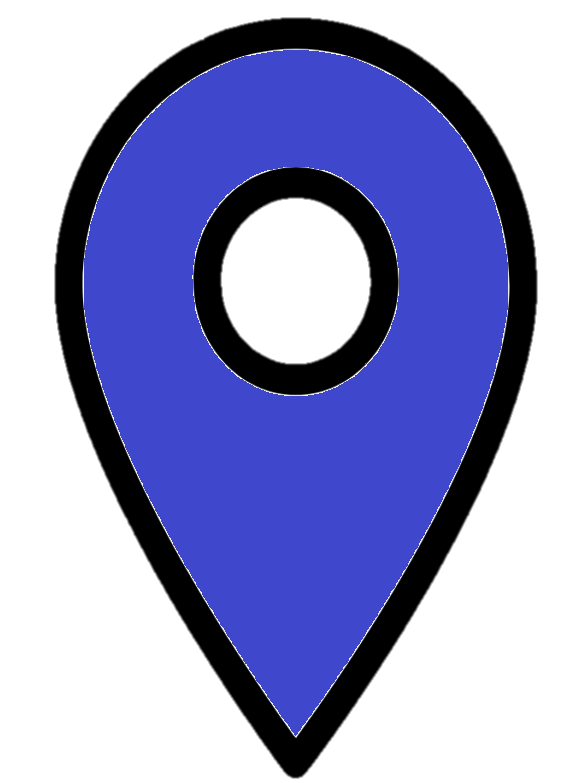
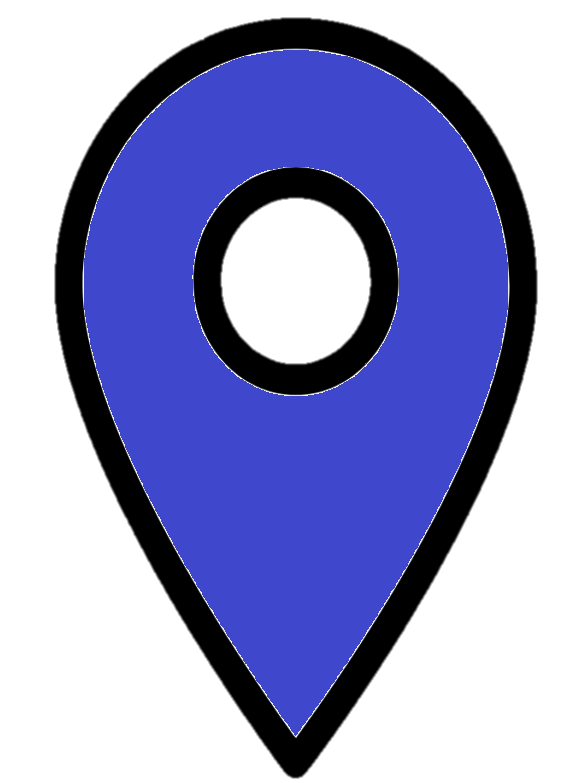
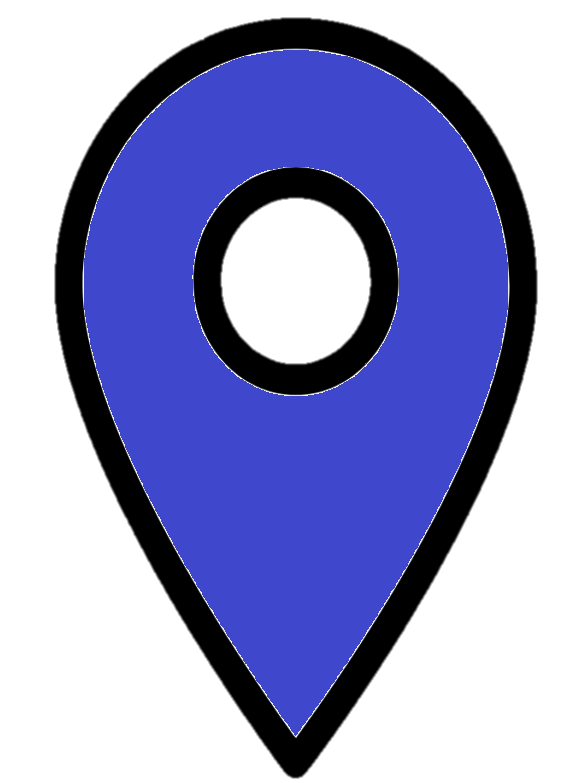
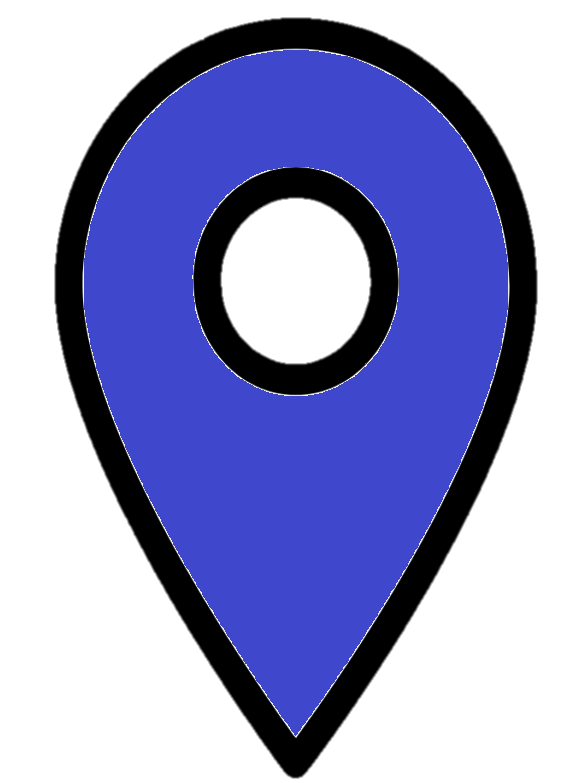
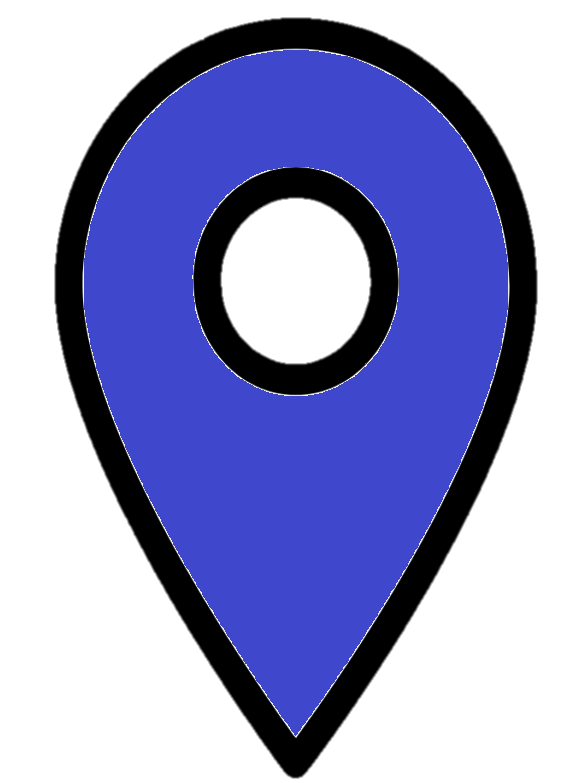
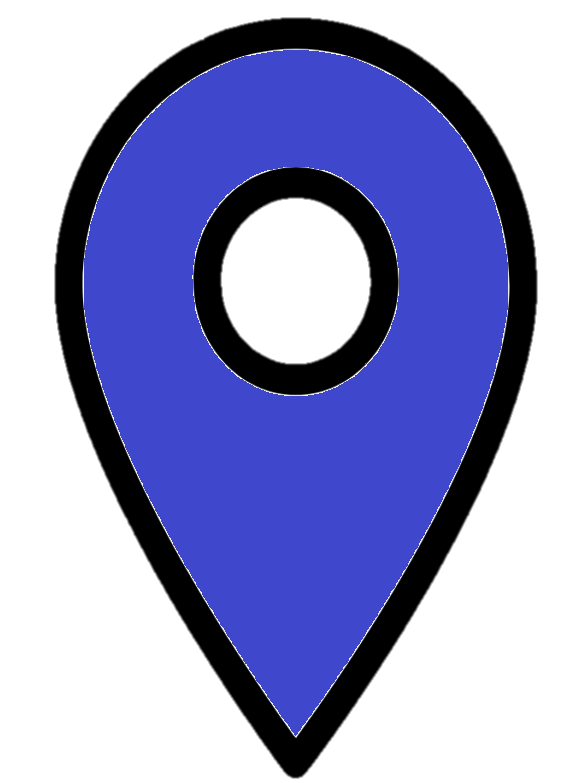
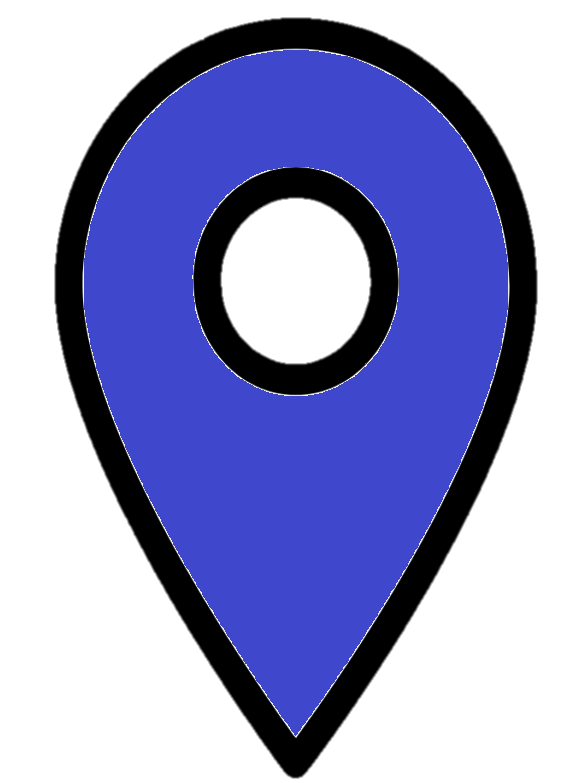
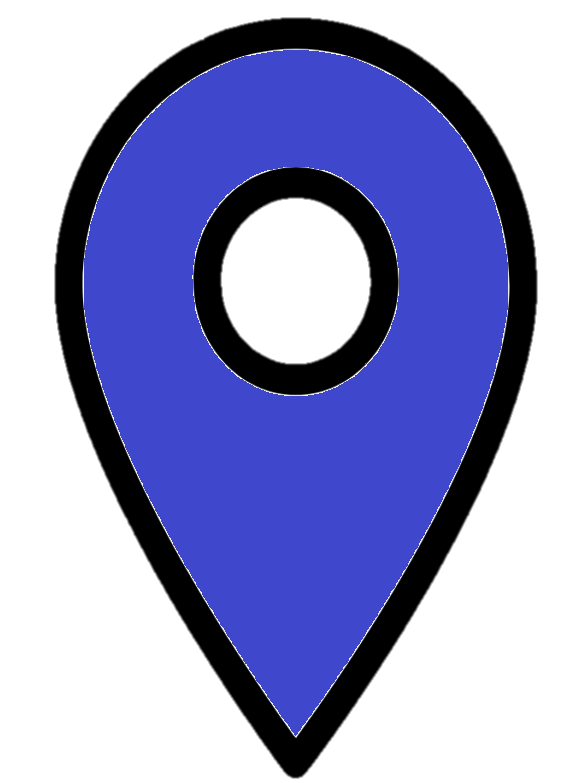
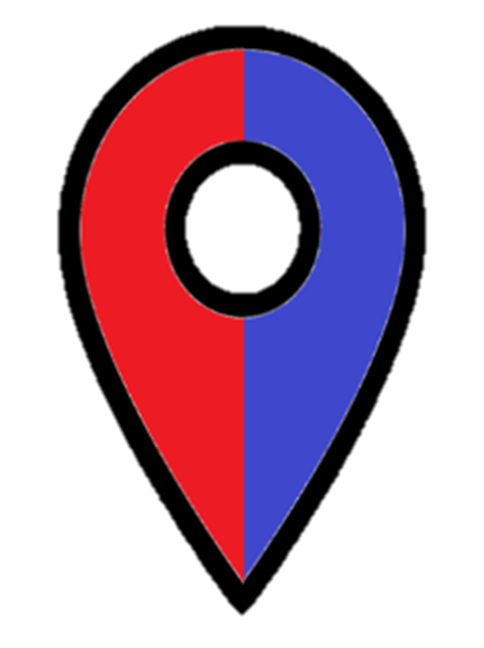
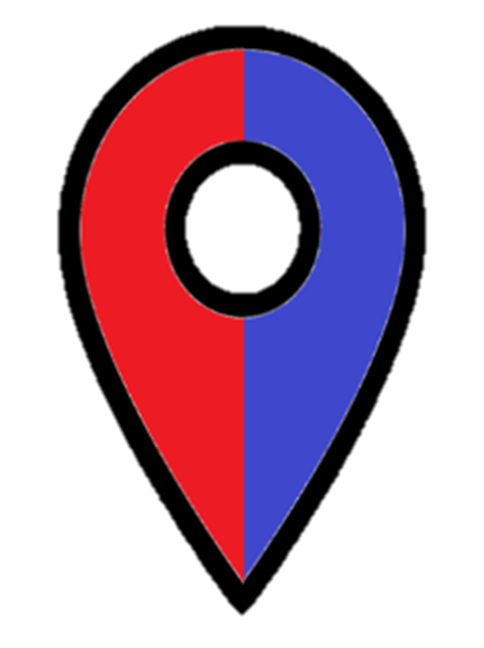
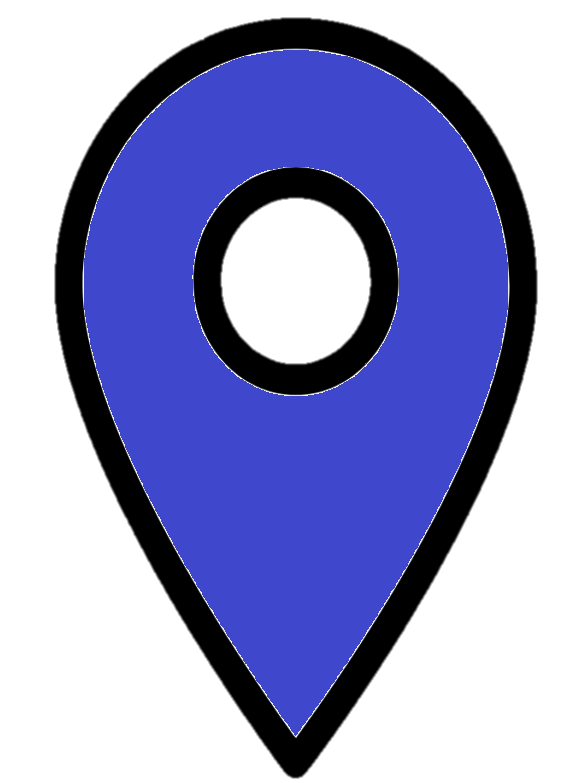
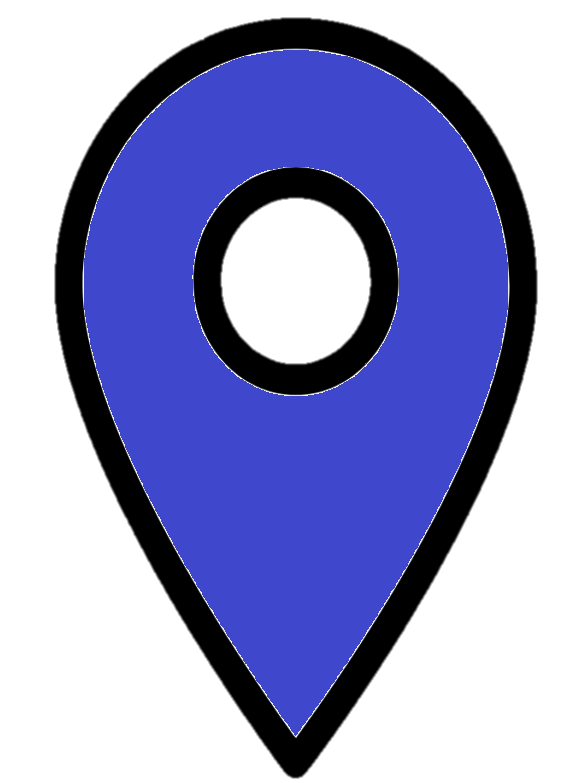

In [4]:
import pandas as pd
from pyproj import Transformer
import geopandas as gpd
import folium
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

dataDREAL = pd.read_csv('C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Exploit_DREAL_CSV.csv', encoding='ISO-8859-1',  sep=';')
data_loc = dataDREAL.iloc[:, [2, 3, 4, 5,8,9,24,30,31]]
data_loc = data_loc.dropna(subset=['EXPLOITANT'], inplace=False)
data_loc = data_loc.dropna(subset=['NAT_EXPLOI'], inplace=False)
data_loc['x'] = pd.to_numeric(data_loc['x'].str.replace(',', '.'))
data_loc['y'] = pd.to_numeric(data_loc['y'].str.replace(',', '.'))
data_loc['AP_DAT_DEB'] = pd.to_datetime(data_loc['AP_DAT_DEB'], errors='coerce')
data_loc = data_loc[data_loc['AP_DAT_DEB'].dt.year > 2010]
data_loc = data_loc[data_loc['STATUT'] == 'Exploitation autorisée']
f_gra = data_loc[data_loc['NAT_EXPLOI'].str.contains("à")]
f_mat = data_loc[data_loc['NAT_EXPLOI'].str.contains("Matériaux")]
f_ind = data_loc[data_loc['NAT_EXPLOI'].str.contains("industrie")]
f_orn = data_loc[data_loc['NAT_EXPLOI'].str.contains("ornementales")]

# Choisir une ville
ville_choisie = "Paris"
# Choisir le rayon
rayon_km = 300
materiaux = "Granulats (0,08mm à 80mm)"
# Création de la carte
geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode(ville_choisie)
ville_coords = (location.latitude, location.longitude)
carte = folium.Map([46.603354, 1.888334], zoom_start=5.5)
coor_transfo = Transformer.from_crs("epsg:2154", "epsg:4326")

# Définition des icones
icon_mapping = {'Granulats (0,08mm à 80mm)': 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone1.png',
                "Roches et minéraux pour l'industrie": 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone2.png',
                "Roches ornementales et de construction" : 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone3.png',
                "Matériaux > 80mm" : 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone4.png',
                "Granulats (0,08mm à 80mm), Roches ornementales et de construction" : 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone5.png',
                "Granulats (0,08mm à 80mm), Matériaux > 80mm" : 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone6.png',
                "Roches et minéraux pour l'industrie, Roches ornementales et de construction" : 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone7.png',
                "Granulats (0,08mm à 80mm), Roches et minéraux pour l'industrie" : "C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone8.png",
                "Granulats (0,08mm à 80mm), Roches et minéraux pour l'industrie, Roches ornementales et de construction" :  'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone9.png',
                "Granulats (0,08mm à 80mm), Matériaux > 80mm, Roches ornementales et de construction" : 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone13.png',
                "Matériaux > 80mm, Roches et minéraux pour l'industrie" : "C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone11.png",
                "Matériaux > 80mm, Roches ornementales et de construction" :"C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone12.png",
                "Granulats (0,08mm à 80mm), Matériaux > 80mm, Roches et minéraux pour l'industrie" : "C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Icone10.png"}

if  materiaux == 'Tous' :
    latlong_origin = list(zip(*coor_transfo.transform(data_loc["x"], data_loc["y"])))
    for origin, exploitant, nat_exploi in zip(latlong_origin, data_loc['EXPLOITANT'], data_loc['NAT_EXPLOI']):
        distance = geodesic(ville_coords, origin).kilometers
        if distance <= rayon_km:            
            icon_path = icon_mapping.get(nat_exploi, 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Carriere.png')
            pop = f"Exploitant: {exploitant}<br/>Distance: {distance:.2f} km<br/>Type de materiaux: {nat_exploi}"
            icon = folium.CustomIcon(icon_path, icon_size=(20, 20), shadow_size=(0, 0))
            folium.Marker(origin, popup=pop, icon=icon).add_to(carte)

elif  materiaux == 'Granulats (0,08mm à 80mm)' :
    latlong_origin = list(zip(*coor_transfo.transform(f_gra["x"], f_gra["y"])))
    for origin, exploitant, nat_exploi in zip(latlong_origin, f_gra['EXPLOITANT'], f_gra['NAT_EXPLOI']):
        distance = geodesic(ville_coords, origin).kilometers
        if distance <= rayon_km:
            icon_path = icon_mapping.get(nat_exploi, 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Carriere.png')
            pop = f"Exploitant: {exploitant}<br/>Distance: {distance:.2f} km<br/>Type de materiaux: {nat_exploi}"
            icon = folium.CustomIcon(icon_path, icon_size=(20, 20), shadow_size=(0, 0))
            folium.Marker(origin, popup=pop, icon=icon).add_to(carte)
            folium.Circle(location=ville_coords, radius=rayon_km*1000, color='blue', fill=False).add_to(carte)

elif materiaux == "Roches et minéraux pour l'industrie" :
    latlong_origin = list(zip(*coor_transfo.transform(f_ind["x"], f_ind["y"])))

    for origin, exploitant, nat_exploi in zip(latlong_origin, f_ind['EXPLOITANT'], f_ind['NAT_EXPLOI']):
        distance = geodesic(ville_coords, origin).kilometers
        if distance <= rayon_km:
            icon_path = icon_mapping.get(nat_exploi, 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Carriere.png')
            pop = f"Exploitant: {exploitant}<br/>Distance: {distance:.2f} km<br/>Type de materiaux: {nat_exploi}"
            icon = folium.CustomIcon(icon_path, icon_size=(20, 20), shadow_size=(0, 0))
            folium.Marker(origin, popup=pop, icon=icon).add_to(carte)
            folium.Circle(location=ville_coords, radius=rayon_km*1000, color='blue', fill=False).add_to(carte)

elif materiaux == "Matériaux > 80mm" :
    latlong_origin = list(zip(*coor_transfo.transform(f_mat["x"], f_mat["y"])))
    # Filtrer les points à l'intérieur du rayon autour de la ville choisie
    for origin, exploitant, nat_exploi in zip(latlong_origin, f_mat['EXPLOITANT'], f_mat['NAT_EXPLOI']):
        distance = geodesic(ville_coords, origin).kilometers
        if distance <= rayon_km:
            icon_path = icon_mapping.get(nat_exploi, 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Carriere.png')
            pop = f"Exploitant: {exploitant}<br/>Distance: {distance:.2f} km<br/>Type de materiaux: {nat_exploi}"
            icon = folium.CustomIcon(icon_path, icon_size=(20, 20), shadow_size=(0, 0))
            folium.Marker(origin, popup=pop, icon=icon).add_to(carte)
            folium.Circle(location=ville_coords, radius=rayon_km*1000, color='blue', fill=False).add_to(carte)

elif materiaux =="Roches ornementales et de construction"  :
    latlong_origin = list(zip(*coor_transfo.transform(f_orn["x"], f_orn["y"])))
    for origin, exploitant, nat_exploi in zip(latlong_origin, f_orn['EXPLOITANT'], f_orn['NAT_EXPLOI']):
        distance = geodesic(ville_coords, origin).kilometers
        if distance <= rayon_km:
            icon_path = icon_mapping.get(nat_exploi, 'C:/Users/aguit/OneDrive/Documents/VSCODE/Unilasalle/Mineur Traitement de données/Data/Carriere.png')
            pop = f"Exploitant: {exploitant}<br/>Distance: {distance:.2f} km<br/>Type de materiaux: {nat_exploi}"
            icon = folium.CustomIcon(icon_path, icon_size=(20, 20), shadow_size=(0, 0))
            folium.Marker(origin, popup=pop, icon=icon).add_to(carte)
            folium.Circle(location=ville_coords, radius=rayon_km*1000, color='blue', fill=False).add_to(carte)
carte